In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stat
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

###### Data Loading

In [2]:
pd.pandas.set_option('display.max_columns',None)
adf=pd.read_excel("E:\Data Trained_ Training\Customer_retention_dataset\customer_retention_dataset.xlsx")


###### Dimension of Dataset

In [4]:
adf.shape

(269, 71)

*Observation : <br>In this Dataset there are:*<br>           *Columns=71 ,     Rows=269*

###### Sample of Dataset

In [5]:
adf.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

###### Rename Columns

In [6]:
adf.rename(columns={"1Gender of respondent":"Gender","2 How old are you? ":"Age","3 Which city do you shop online from?":"City_of_purchase",
                    "4 What is the Pin Code of where you shop online from?":"Pincode","5 Since How Long You are Shopping Online ?":"years_shopping_online",
                    "6 How many times you have made an online purchase in the past 1 year?":"purchase_per_year",
                    "7 How do you access the internet while shopping on-line?":"Internet_type",
                    "8 Which device do you use to access the online shopping?":"Device_used",
                    "9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ":"Device_Screensize",
                    "10 What is the operating system (OS) of your device?\t\t\t\t                                          ":"Device_OS",
                    "11 What browser do you run on your device to access the website?\t\t\t                                                          ":"Browser_used",
                    "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ":"Channel_used",
                    "13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ":"reached_retailstore_After_1stvisit",
                    "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ":"before_purchase_exploreTime",
                    "15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ":"payment_Option",
                    "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ":"abandon_frequency",
                    "17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ":"abandon_reason",
                    "18 The content on the website must be easy to read and understand":"website_content",
                    "19 Information on similar product to the one highlighted  is important for product comparison":"Product Information",
                    "20 Complete information on listed seller and product being offered is important for purchase decision.":"seller/product_information",
                    "21 All relevant information on listed products must be stated clearly":"Product relevant information",
                    "22 Ease of navigation in website":"Website_Naigation", "23 Loading and processing speed":"Loading_speed",
                    "24 User friendly Interface of the website":"User_friendly_UI","25 Convenient Payment methods":"Convenient_paymnet_method",
                    "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time":"Trusted_stipulated_time",
                    "27 Empathy (readiness to assist with queries) towards the customers":"cust_query_assistance",
                    "28 Being able to guarantee the privacy of the customer":"customer_privacy",
                    "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)":"communication_channels",
                    "30 Online shopping gives monetary benefit and discounts":"benefit/discounts",
                    "31 Enjoyment is derived from shopping online":"Enjoyment","32 Shopping online is convenient and flexible":"convence_flexiblity",
                    "33 Return and replacement policy of the e-tailer is important for purchase decision":"Return/replacement_policy",
                    "34 Gaining access to loyalty programs is a benefit of shopping online":"loyalty_programs",
                    "35 Displaying quality Information on the website improves satisfaction of customers":"website quality Information",
                    "36 User derive satisfaction while shopping on a good quality website or application":"website/app Qulity",
                    "37 Net Benefit derived from shopping online can lead to users satisfaction":"Net Benefit",
                    "38 User satisfaction cannot exist without trust":"trust",
                    "39 Offering a wide variety of listed product in several category":"product category",
                    "40 Provision of complete and relevant product information":"complete/relevant_prod_info",
                    "41 Monetary savings":"Monetary_savings","42 The Convenience of patronizing the online retailer":"patronizing_retailer",
                    "43 Shopping on the website gives you the sense of adventure":"sense of adventure",
                    "44 Shopping on your preferred e-tailer enhances your social status":"social_status",
                    "45 You feel gratification shopping on your favorite e-tailer":"feel_gratified",
                    "46 Shopping on the website helps you fulfill certain roles":"roles",
                    "47 Getting value for money spent":"value_for_money",
                    "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ":"tick_retailers",
                    "Easy to use website or application":"Easyness_of_web/app",
                    "Visual appealing web-page layout":"web-page layout", 
                    "Wild variety of product on offer":"product on offer",
                    "Complete, relevant description information of products":"description_Prod_info",
                    "Fast loading website speed of website and application":"load_speed_of_web/app",
                    "Reliability of the website or application":"Reliability_of_web/app",
                    "Quickness to complete purchase":"Quickness_complete_purchase",
                    "Availability of several payment options":"Available_payment_options", 
                    "Speedy order delivery ":"Speedy_order_delivery",
                    "Privacy of customers’ information":"Privacy of customers’ information",
                    "Security of customer financial information":"financial_Security",
                    "Perceived Trustworthiness":"Trustworthiness",
                    "Presence of online assistance through multi-channel":"online assistance",
                    "Longer time to get logged in (promotion, sales period)":"loggedin_time(promotion/sales)",
                    "Longer time in displaying graphics and photos (promotion, sales period)":"display_time(promotion/sales)",
                    "Late declaration of price (promotion, sales period)":"price declaration(promotion/sales)",
                    "Longer page loading time (promotion, sales period)":"loading time (promotion/sales)",
                    "Limited mode of payment on most products (promotion, sales period)":"payment_mode(promotion/sales)",
                    "Longer delivery period":"Longer delivery period", 
                    "Change in website/Application design":"Change in web/App design",
                    "Frequent disruption when moving from one page to another":"Frequent_disruption",
                    "Website is as efficient as before":"Website_efficience",
                     "Which of the Indian online retailer would you recommend to a friend?":"recommendation"},inplace=True)

In [7]:
adf.head()

,Gender,Age,City_of_purchase,Pincode,years_shopping_online,purchase_per_year,Internet_type,Device_used,Device_Screensize,Device_OS,Browser_used,Channel_used,reached_retailstore_After_1stvisit,before_purchase_exploreTime,payment_Option,abandon_frequency,abandon_reason,website_content,Product Information,seller/product_information,Product relevant information,Website_Naigation,Loading_speed,User_friendly_UI,Convenient_paymnet_method,Trusted_stipulated_time,cust_query_assistance,customer_privacy,communication_channels,benefit/discounts,Enjoyment,convence_flexiblity,Return/replacement_policy,loyalty_programs,website quality Information,website/app Qulity,Net Benefit,trust,product category,complete/relevant_prod_info,Monetary_savings,patronizing_retailer,sense of adventure,social_status,feel_gratified,roles,value_for_money,tick_retailers,Easyness_of_web/app,web-page layout,product on offer,description_Prod_info,load_speed_of_web/app,Reliability_of_web/app,Quickness_complete_purchase,Available_payment_options,Speedy_order_delivery,Privacy of customers’ information,financial_Security,Trustworthiness,online assistance,loggedin_time(promotion/sales),display_time(promotion/sales),price declaration(promotion/sales),loading time (promotion/sales),payment_mode(promotion/sales),Longer delivery period,Change in web/App design,Frequent_disruption,Website_efficience,recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongl

###### Breif about Dataset

In [8]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Gender                              269 non-null    object
 1   Age                                 269 non-null    object
 2   City_of_purchase                    269 non-null    object
 3   Pincode                             269 non-null    int64 
 4   years_shopping_online               269 non-null    object
 5   purchase_per_year                   269 non-null    object
 6   Internet_type                       269 non-null    object
 7   Device_used                         269 non-null    object
 8   Device_Screensize                   269 non-null    object
 9   Device_OS                           269 non-null    object
 10  Browser_used                        269 non-null    object
 11  Channel_used                        269 non-null    object

*Observation :*<br>*In this Dataset there are :*
<br>*int type column    =1* 
<br>*Object type columns=70*
<br>*All columns non null value count=269 (It means dataset have no missing values)*

###### Statistical Summary of Data

for numerical variable

In [9]:
adf.describe(exclude='object')

,Pincode
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


for categorical variable

In [10]:
adf.describe(include=[object]) 

,Gender,Age,City_of_purchase,years_shopping_online,purchase_per_year,Internet_type,Device_used,Device_Screensize,Device_OS,Browser_used,Channel_used,reached_retailstore_After_1stvisit,before_purchase_exploreTime,payment_Option,abandon_frequency,abandon_reason,website_content,Product Information,seller/product_information,Product relevant information,Website_Naigation,Loading_speed,User_friendly_UI,Convenient_paymnet_method,Trusted_stipulated_time,cust_query_assistance,customer_privacy,communication_channels,benefit/discounts,Enjoyment,convence_flexiblity,Return/replacement_policy,loyalty_programs,website quality Information,website/app Qulity,Net Benefit,trust,product category,complete/relevant_prod_info,Monetary_savings,patronizing_retailer,sense of adventure,social_status,feel_gratified,roles,value_for_money,tick_retailers,Easyness_of_web/app,web-page layout,product on offer,description_Prod_info,load_speed_of_web/app,Reliability_of_web/app,Quickness_complete_purchase,Available_payment_options,Speedy_order_delivery,Privacy of customers’ information,financial_Security,Trustworthiness,online assistance,loggedin_time(promotion/sales),display_time(promotion/sales),price declaration(promotion/sales),loading time (promotion/sales),payment_mode(promotion/sales),Longer delivery period,Change in web/App design,Frequent_disruption,Website_efficience,recommendation
count,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,5,6,4,4,4,3,4,3,5,5,3,4,5,4,4,5,4,4,5,5,3,4,4,3,4,5,5,4,3,5,3,3,4,5,4,4,4,3,5,5,5,5,3,9,10,10,9,11,10,10,9,11,6,11,11,9,10,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,more than 15 mins,Credit/Debit cards,Sometimes,Better alternative offer,Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),indifferent (3),indifferent (3),indifferent (3),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Amazon.in,Amazon.in,Amazon.com,"Amazon.in, Flipkart.com",Amazon.in,Amazon.in,Amazon.in,Amazon.in,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,98,114,142,141,134,122,216,230,87,123,148,171,133,164,116,101,132,141,115,189,159,141,194,185,149,105,86,146,198,115,133,175,164,122,111,135,148,138,101,100,101,88,149,82,64,87,130,100,51,61,66,65,107,71,51,76,61,57,60,75,61,87,72,96,53,94,79


###### check for unique values in columns

In [11]:
adf.nunique().sort_values(ascending = True)

Gender                             2
value_for_money                    3
patronizing_retailer               3
website quality Information        3
Return/replacement_policy          3
                                  ..
loading time (promotion/sales)    11
description_Prod_info             11
City_of_purchase                  11
financial_Security                11
Pincode                           39
Length: 71, dtype: int64

###### check for missing values in columns

In [12]:
print("Total missing values :",adf.isnull().sum().sum())

Total missing values : 0


###### check for zeros in columns

In [13]:
print(adf[adf==0].count())

Gender                      0
Age                         0
City_of_purchase            0
Pincode                     0
years_shopping_online       0
                           ..
Longer delivery period      0
Change in web/App design    0
Frequent_disruption         0
Website_efficience          0
recommendation              0
Length: 71, dtype: int64


In [14]:
print('Total zeros in Dataset :',adf[adf==0].count().sum())

Total zeros in Dataset : 0


In [15]:
print("Total % of Zeros as Value in Columns :\n")
adf[adf==0].count()/adf.shape[0]*100 

Total % of Zeros as Value in Columns :



Gender                      0.0
Age                         0.0
City_of_purchase            0.0
Pincode                     0.0
years_shopping_online       0.0
                           ... 
Longer delivery period      0.0
Change in web/App design    0.0
Frequent_disruption         0.0
Website_efficience          0.0
recommendation              0.0
Length: 71, dtype: float64

###### check for duplicate rows

In [16]:
sum(adf.duplicated())

166

*Observation :*<br>*In dataset there are 166 duplicate rows*

###### Identification of numbers

check for numerical variables

In [17]:
numerical_features = [feature for feature in adf.columns if adf[feature].dtypes != 'O']
print('Number of numerical variables  : ', len(numerical_features))

Number of numerical variables  :  1


In [18]:
adf[numerical_features].columns

Index(['Pincode'], dtype='object')

check for categorical variable

In [19]:
categorical_features=[feature for feature in adf.columns if adf[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  70


In [20]:
adf[categorical_features].columns

Index(['Gender', 'Age', 'City_of_purchase', 'years_shopping_online',
       'purchase_per_year', 'Internet_type', 'Device_used',
       'Device_Screensize', 'Device_OS', 'Browser_used', 'Channel_used',
       'reached_retailstore_After_1stvisit', 'before_purchase_exploreTime',
       'payment_Option', 'abandon_frequency', 'abandon_reason',
       'website_content', 'Product Information', 'seller/product_information',
       'Product relevant information', 'Website_Naigation', 'Loading_speed',
       'User_friendly_UI', 'Convenient_paymnet_method',
       'Trusted_stipulated_time', 'cust_query_assistance', 'customer_privacy',
       'communication_channels', 'benefit/discounts', 'Enjoyment',
       'convence_flexiblity', 'Return/replacement_policy', 'loyalty_programs',
       'website quality Information', 'website/app Qulity', 'Net Benefit',
       'trust', 'product category', 'complete/relevant_prod_info',
       'Monetary_savings', 'patronizing_retailer', 'sense of adventure',
      

###### check for cardinality

Text(0.5, 1.0, 'Cardinality')

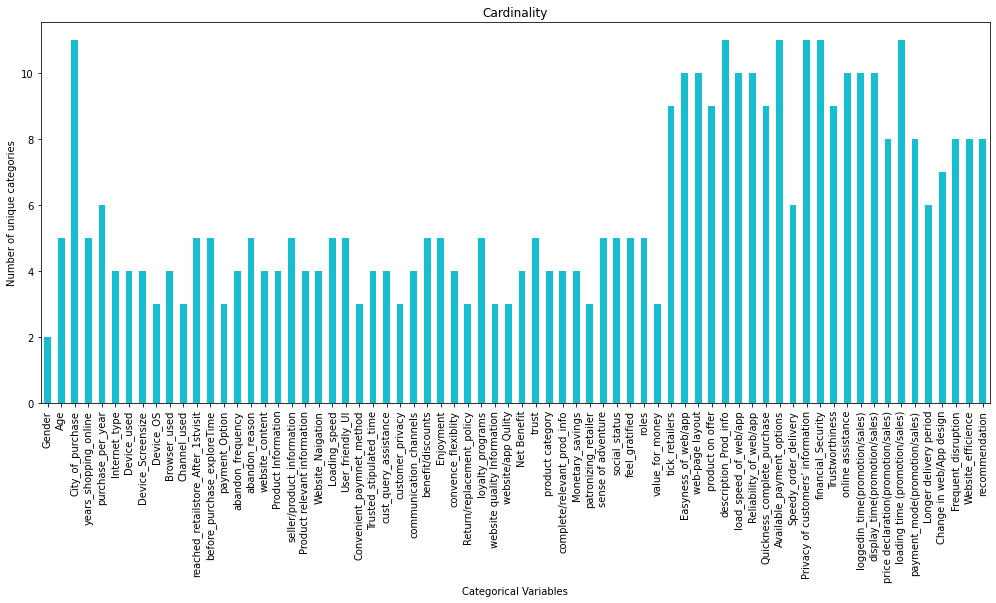

In [21]:
adf[categorical_features].nunique().plot.bar(figsize=(17,7),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.xticks(rotation=90)
plt.title('Cardinality')

###### check for skewness

In [23]:
adf.skew()
#adf.skew().plot(kind='barh',color='#9467bd',figsize=(19,5))

Pincode    1.748322
dtype: float64

###### Identify Target and Feature Variable

Target: Purchase per Year

###### Univariate Analysis

Text(0.5, 1.0, 'How old are you')

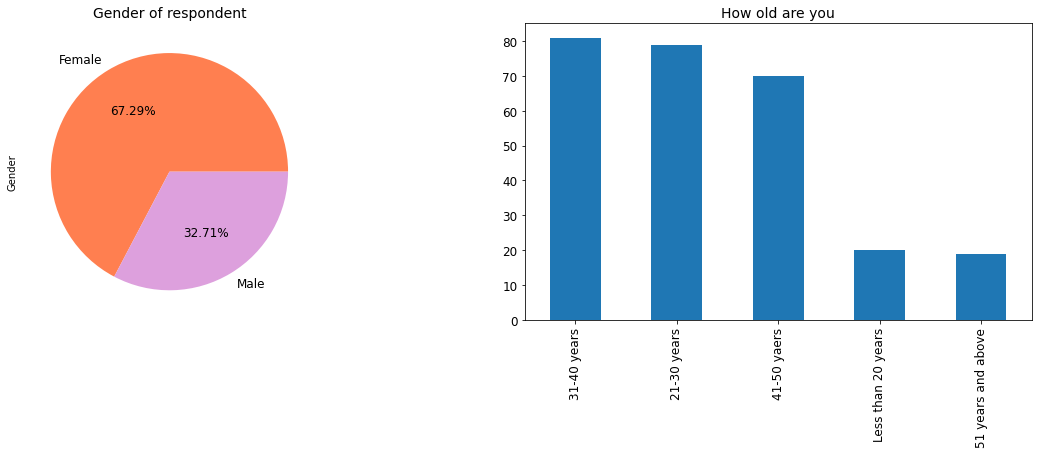

In [24]:
#1. Gender of respondent
plt.subplot(2,2,1)
adf['Gender'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(20,12),colors = ['coral','plum'])
plt.title("Gender of respondent", fontsize=14)

#2 How old are you?
plt.subplot(2,2,2)
adf['Age'].value_counts().plot(kind = "bar",fontsize=12,figsize=(20,12))
plt.title("How old are you", fontsize=14)

*Observation :*
<br>*Gender Column : online shopping Female=67% ,Male=32%*
<br>*Online shopping Female > Male*
<br>*Female do online shopping more incompare to male*
<br>*Age column : 21 to 40 age group people do shopping more*
<br>*21-40y>41-50y>1-8 and 51+*

Text(0.5, 1.0, 'Years you are Shopping Online')

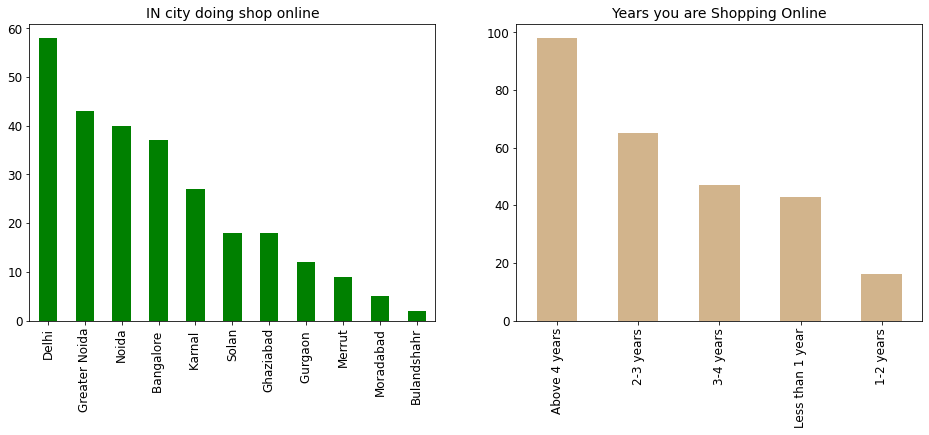

In [25]:
#3 Which city do you shop online from?
plt.subplot(2,2,1)
adf['City_of_purchase'].value_counts().plot(kind = "bar",fontsize=12,figsize=(16,12),color = 'green')
plt.title("IN city doing shop online", fontsize=14)

#5 Since How Long You are Shopping Online ?
plt.subplot(2,2,2)
adf['years_shopping_online'].value_counts().plot(kind = "bar",fontsize=12,figsize=(16,12),color = 'tan')
plt.title("Years you are Shopping Online", fontsize=14)


*Observation :*<br>*In city Column: Metro city have max online shopping*
<br>*Delhi>Grt noida & Noida>Banglore>Kamal & Gaziabad>Gurgaon>Moradabad>Bulandshahr*
<br>*IN Years column: MAx people doing online shopping for more than 4 years*
<br>*4+y>2-3y>months-1-4y>1-2y*

<AxesSubplot:>

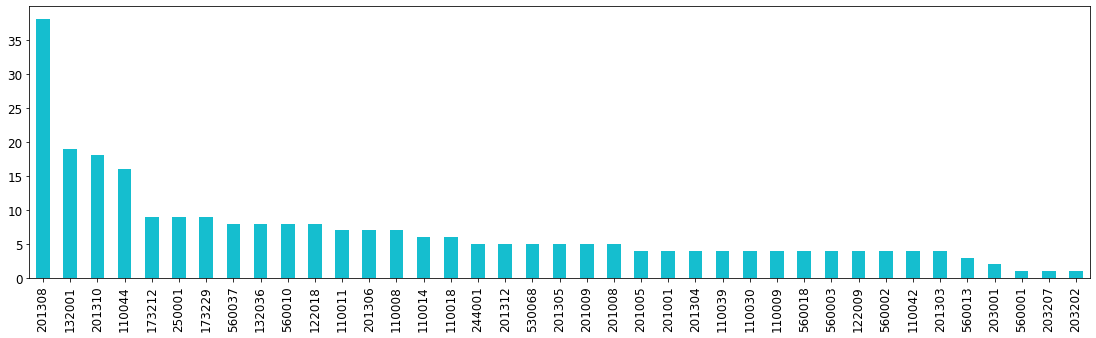

In [26]:
#4 What is the Pin Code of where you shop online from?
adf['Pincode'].value_counts().plot(kind = "bar",fontsize=12,figsize=(19,5),color='#15becf')

*Observation :*<br>*In pincode column: 201308 have max shopping online*
<br>*132001,201310,110044 have 2nd max shopping online*
<br>*560001,203207,203202 have least shopping online*

Text(0.5, 1.0, 'internet use for shopping on-line')

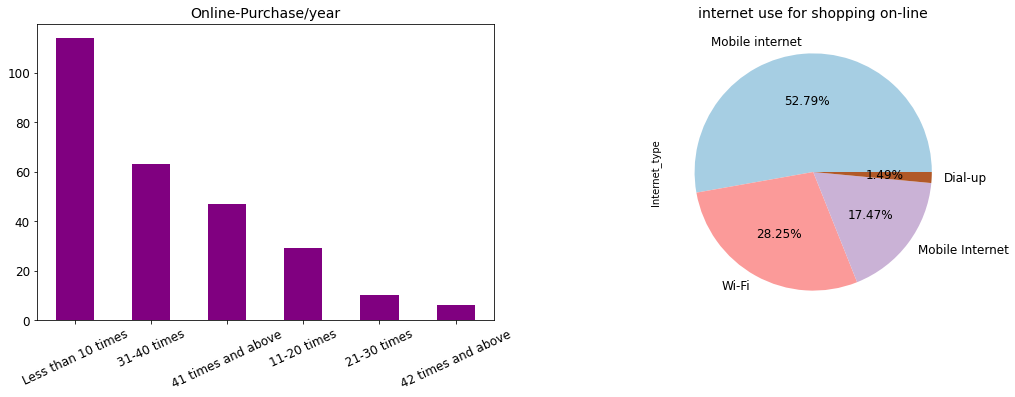

In [27]:
#6 How many times you have made an online purchase in the past 1 year?
plt.subplot(2,2,1)
adf['purchase_per_year'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,12),color = 'purple')
plt.title("Online-Purchase/year", fontsize=14)
plt.xticks(rotation=25)
#7 How do you access the internet while shopping on-line?
plt.subplot(2,2,2)
adf['Internet_type'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='Paired')
plt.title("internet use for shopping on-line", fontsize=14)


*Observation :*
<br>*In Purchase/Year column: max people purchase less than 10 times/year*
<br>*less than10>31-40 time>41-40+ times>11-20 time>21-30 time>42-42+time*
<br>*purchase count increase than people count decrease*
<br>*In Internet Type column : Mostly prople use mobile internet for shopping online*
<br>*Very less use dialup internet*
<br>*Mobile Net>Wifi>Dial-up*
<br><br>*Mobile Internet and Mobile internet same option but  differ by Capital Letter* 

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

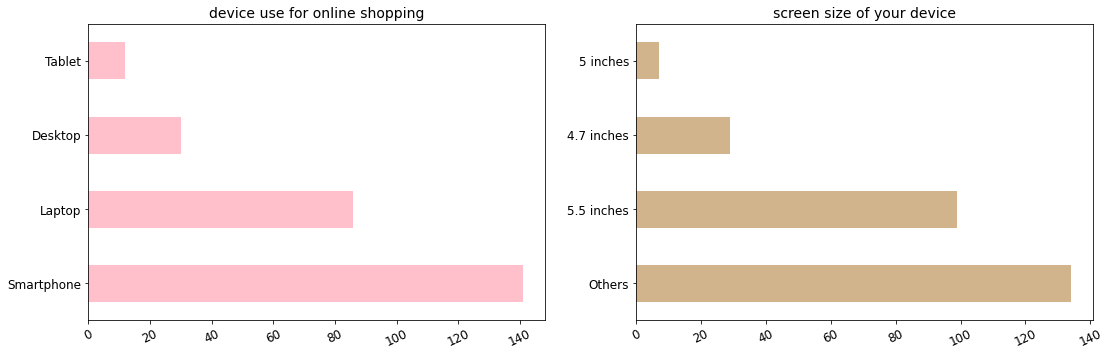

In [960]:
#8 Which device do you use to access the online shopping?
plt.subplot(2,2,1)
adf['Device_used'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,12),color='pink')
plt.title("device use for online shopping", fontsize=14)
plt.xticks(rotation=25)
#9 What is the screen size of your mobile device?
plt.subplot(2,2,2)
adf['Device_Screensize'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,12),color='tan')
plt.title("screen size of your device", fontsize=14)
plt.xticks(rotation=25)

*Observation :*
<br>*In Device_used column: max people use Smartphone and 2nd highest max people use laptop for online shoppiing*
<br>*Less People use Tablet and desktop*
<br>*Smartphone>Laptop>Desktop>Tablet*
<br>*In Device Screen Size column : very less Device have 5 inch Screen size*
<br>*Max Device have more/less than 5.5 screen size 2nd highest max peole have screen size 5.5 inches*
<br>*Others>5.5 inch>4.7inch>5inch*

<AxesSubplot:>

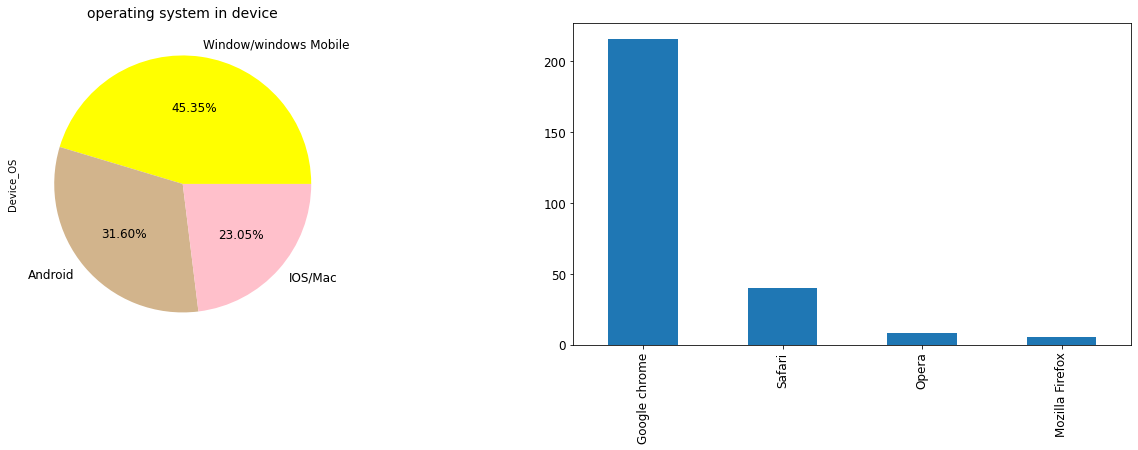

In [961]:
#10 What is the operating system (OS) of your device?
plt.subplot(2,2,1)
adf['Device_OS'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(22,13),colors=['yellow','tan','pink'])
plt.title("operating system in device", fontsize=14)

#11 What browser do you run on your device to access the website?
plt.subplot(2,2,2)
adf['Browser_used'].value_counts().plot(kind = "bar",fontsize=12,figsize=(22,13))


*Observation :*
<br>*In Device OS Column: Windows=45%, Android=31%, IOS/Mac=23% people use*
<br>*Browser used Column: Google chrome is used maximum and Firefox is used least*<br>*Google>Safari>Opera>Firefox*

Text(0.5, 1.0, 'time do you explore')

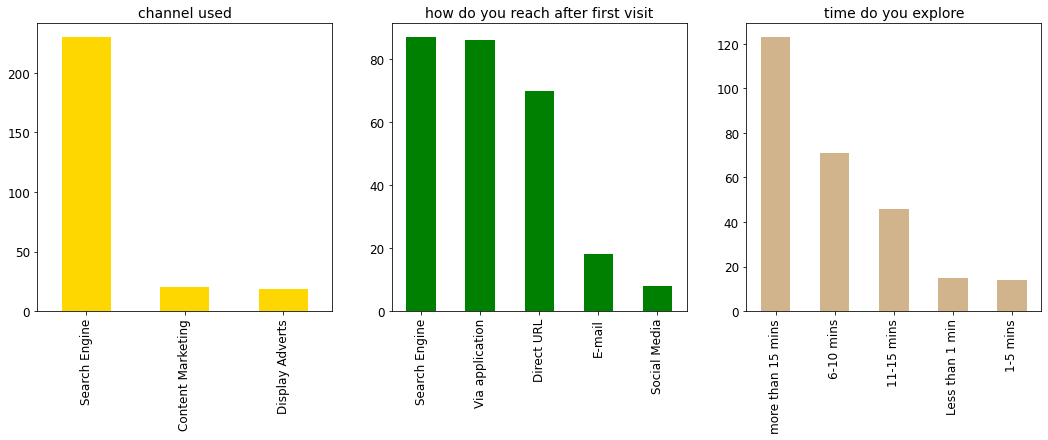

In [962]:
#12 Which channel did you follow to arrive at your favorite online store for the first time?
plt.subplot(3,3,1)
adf['Channel_used'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18),color='gold')
plt.title("channel used", fontsize=14)

#13 After first visit, how do you reach the online retail store?
plt.subplot(3,3,2)
adf['reached_retailstore_After_1stvisit'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18),color = 'green')
plt.title("how do you reach after first visit", fontsize=14)

#14 How much time do you explore the e- retail store before making a purchase decision?
plt.subplot(3,3,3)
adf['before_purchase_exploreTime'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18),color='tan')
plt.title("time do you explore", fontsize=14)

*Observation :*<br>
*In Channel_used column :*<br>
*Maximum people use Search Engine to reach favorite online store for the first time*<br>
*Very less people use content marketing/Display Advertisments*
<br><br>*In reached_retailstore_After_1stvisit column :*
<br>*MAx people use Search Engine/app to reach to fav online retail store after 1st visit*
<br>*2nd highest is Direct URL people use  to rech after first visit*
<br>*Very less people use Email/Social Media to reach fav retail store online after first visit*
<br>*Search Engine/app > Direct URL > Email > Social Media*
<br><br>*In the 'before_purchase_exploreTime column :*
<br>*Max people Explore e store 16-10/5 min or more min before making purpase*
<br>*very Less people explore less or upto 5 min*
<br>*15+ min > 6-10 min > 11-15 min > lees than 15 min > 1-5 min*

Text(0.5, 1.0, 'Convenient Payment methods')

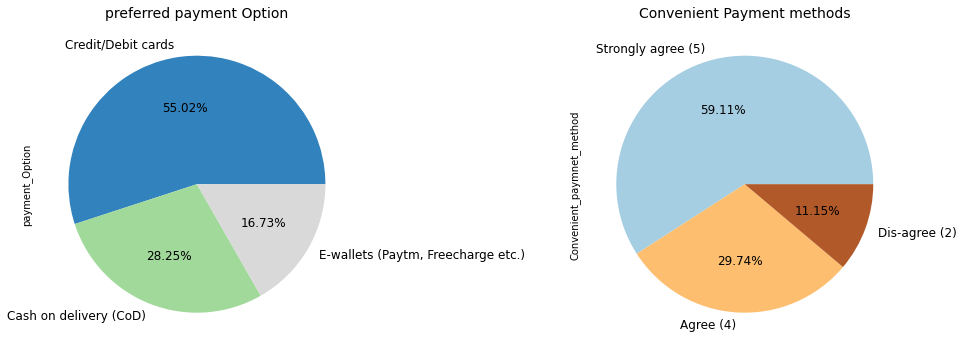

In [963]:
#15 What is your preferred payment Option?
plt.subplot(2,2,1)
adf['payment_Option'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='tab20c')
plt.title("preferred payment Option", fontsize=14)

#25 Convenient Payment methods
plt.subplot(2,2,2)
adf['Convenient_paymnet_method'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='Paired')
plt.title("Convenient Payment methods", fontsize=14)


*Observation :*<br>*In payment_Option column :*
<br>*55% of people use Credit/Debit card for Payment option, 28% use COD and only 16% use E-wallets*
<br>*In Convenient_paymnet_method colum 59% people Strongly agree and 29% agree, Only 11% disagree*

Text(0.5, 1.0, 'Why abandon')

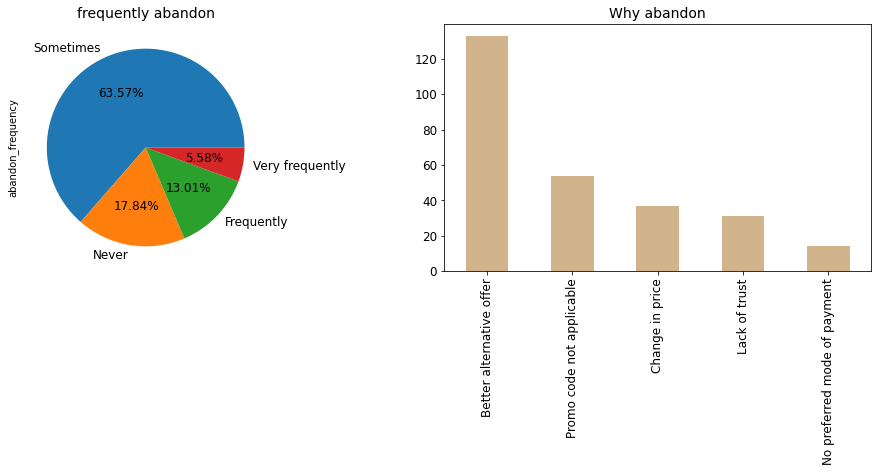

In [964]:
#16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?
plt.subplot(2,3,1)
adf['abandon_frequency'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(26,13))
plt.title("frequently abandon", fontsize=14)

#17 Why did you abandon the “Bag”, “Shopping Cart”?
plt.subplot(2,3,2)
adf['abandon_reason'].value_counts().plot(kind = "bar",fontsize=12,figsize=(26,10),color = 'tan')
plt.title("Why abandon", fontsize=14)


*Observation :*<br>*In abandon_frequency column only 5.5% very frequent/ 13% frquently abandon items*
<br>*63% Max people sometime have abandon items and 17% never abandon item*
<br>*In abandon_reason column:*
<br>*maxiumn people abandom item because of better alternative offer very less people because of payment mode*
<br>*Better Alternative Offer > Prmocode not aaplicable > change in Price > Lack of Trust > No preffered Payment Mode*

Text(0.5, 1.0, 'relevant information')

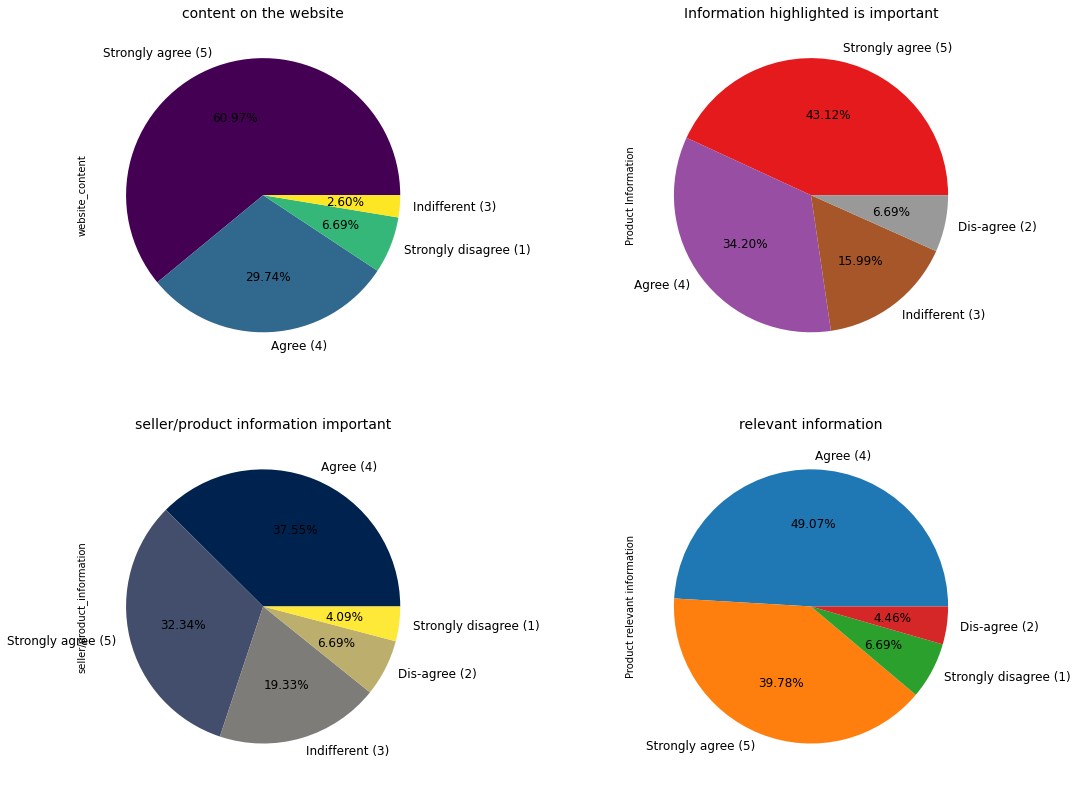

In [965]:
#18 The content on the website must be easy to read and understand
plt.subplot(4,2,1)
adf['website_content'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,29),colormap='viridis')
plt.title("content on the website", fontsize=14)

#19 Information on similar product to the one highlighted is important for product comparison
plt.subplot(4,2,2)
adf['Product Information'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,29),colormap='Set1')
plt.title("Information highlighted is important", fontsize=14)

#20 Complete information on listed seller and product being offered is important for purchase decision.
plt.subplot(4,2,3)
adf['seller/product_information'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,29),colormap='cividis')
plt.title("seller/product information important", fontsize=14)

#21 All relevant information on listed products must be stated clearly
plt.subplot(4,2,4)
adf['Product relevant information'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,29))
plt.title("relevant information", fontsize=14)

*Observation :*<br>*In website_content column :*<br>*most of the people agree with content of website must be easy to read and understandable, only 7% disagree*
<br>*In 'Product Information :*<br>*most of the people agree Information on similar product to the one highlighted is important for product comparison, only 7% disagree*
<br>*In seller/product_information :*<br>*most of the people agree Complete information on listed seller and product being offered is important for purchase decision, only 10% disagree*
<br>*In Product relevant information column :*<br>*most of the people agree All relevant information on listed products must be stated clearly, only 7% disagree*

Text(0.5, 1.0, 'User friendly website Interface')

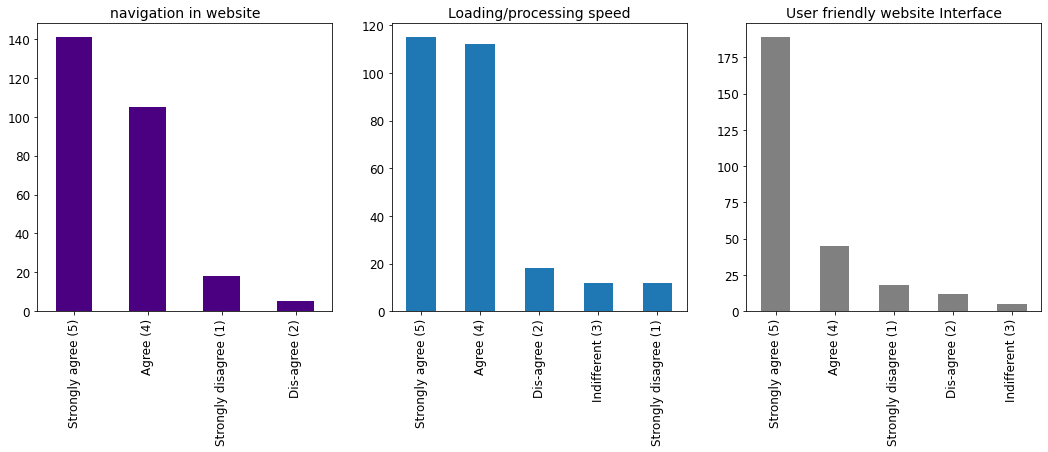

In [966]:
#22 Ease of navigation in website
plt.subplot(3,3,1)
adf['Website_Naigation'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18),color = 'indigo')
plt.title("navigation in website", fontsize=14)

#23 Loading and processing speed
plt.subplot(3,3,2)
adf['Loading_speed'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18))
plt.title("Loading/processing speed", fontsize=14)

#24 User friendly Interface of the website
plt.subplot(3,3,3)
adf['User_friendly_UI'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,18),color = 'grey')
plt.title("User friendly website Interface", fontsize=14)

*Observation :*<br>*In Website_Naigation column maximum people agree that website should have Ease navigation*
<br>*In Loading_speed column max people agree with Loading should have speed*
<br>*In User_friendly_UI column max people agree that UI should be user friendly*

Text(0.5, 1.0, 'communication channels')

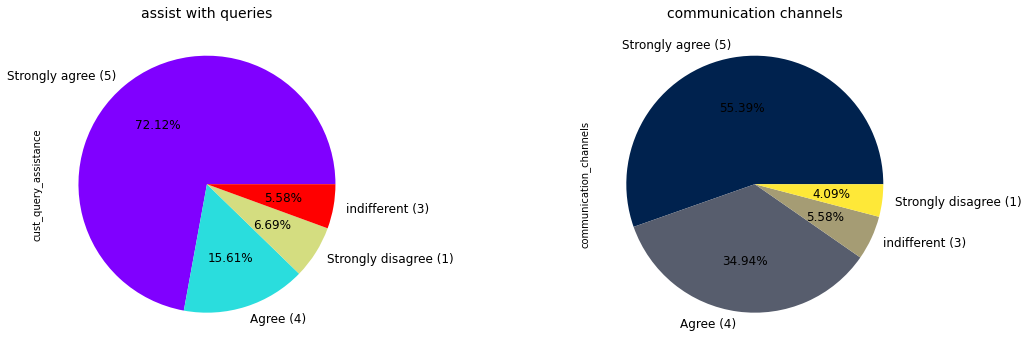

In [967]:
#27 Empathy (readiness to assist with queries) towards the customers
plt.subplot(2,2,1)
adf['cust_query_assistance'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='rainbow')
plt.title("assist with queries", fontsize=14)

#29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
plt.subplot(2,2,2)
adf['communication_channels'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='cividis')
plt.title("communication channels", fontsize=14)

*Observation :*<br>*In cust_query_assistance column 72% strongly agree, 15% agree readiness to assist with queries of customer, Only 7% disagree*
<br>*communication_channels column 55% strongly agree,34% agree with the communication channels, only 5% disagree*

Text(0.5, 1.0, 'guarantee the privacy of the customer')

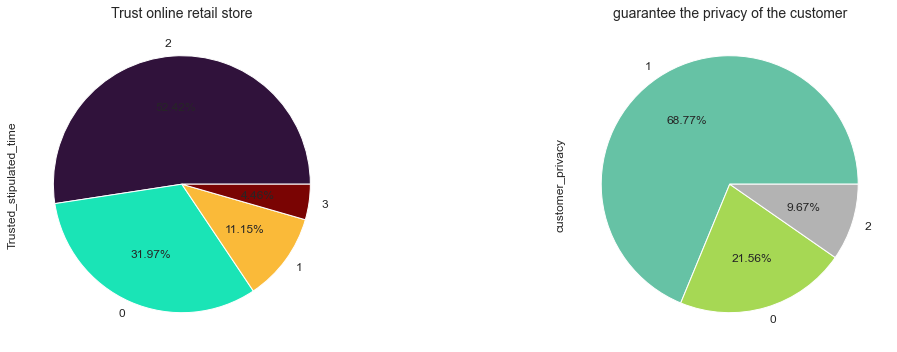

In [169]:
#26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time
plt.subplot(2,2,1)
adf['Trusted_stipulated_time'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='turbo')
plt.title("Trust online retail store", fontsize=14)

#28 Being able to guarantee the privacy of the customer
plt.subplot(2,2,2)
adf['customer_privacy'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='Set2')
plt.title("guarantee the privacy of the customer", fontsize=14)

*Observation :*<br>*In Trusted_stipulated_time column max people agree/trongly agree Trust that the online retail store will fulfil its part of the transaction at the stipulated time*
<br>*In customer_privacy column max person agree with guarantee the privacy of the customer*

Text(0.5, 1.0, 'seller/product information important')

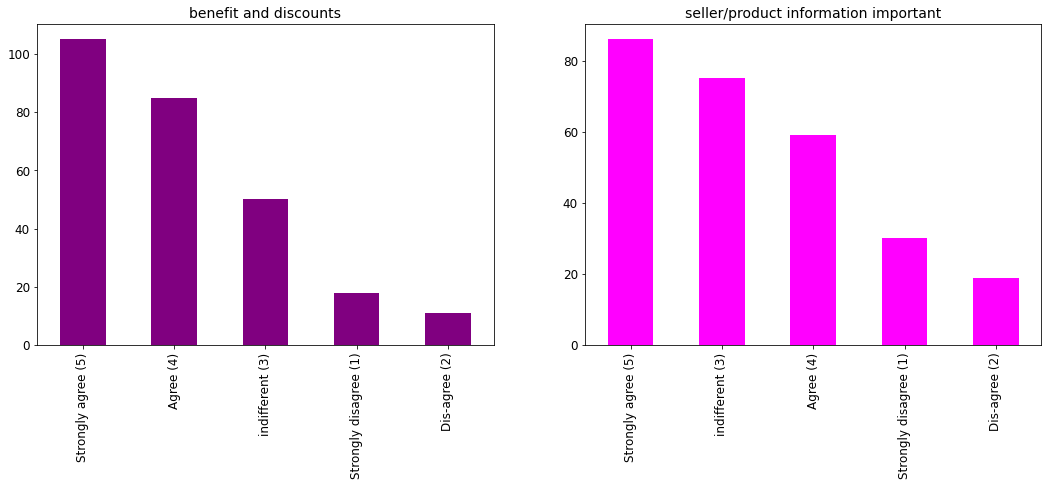

In [969]:
#30 Online shopping gives monetary benefit and discounts
plt.subplot(2,2,1)
adf['benefit/discounts'].value_counts().plot(kind = 'bar',fontsize=12,figsize=(18,13),color='purple')
plt.title("benefit and discounts", fontsize=14)

#31 Enjoyment is derived from shopping online
plt.subplot(2,2,2)
adf['Enjoyment'].value_counts().plot(kind = 'bar',fontsize=12,figsize=(18,13),color='magenta')
plt.title("seller/product information important", fontsize=14)


*Observation :*<br>*In benefit_discounts column max people agree/stronly agree Online shopping gives monetary benefit and discounts*
<br>*In Enjoyment column max people agree/stronly agree Enjoyment is derived from shopping online*

Text(0.5, 1.0, 'Return/replacement policy')

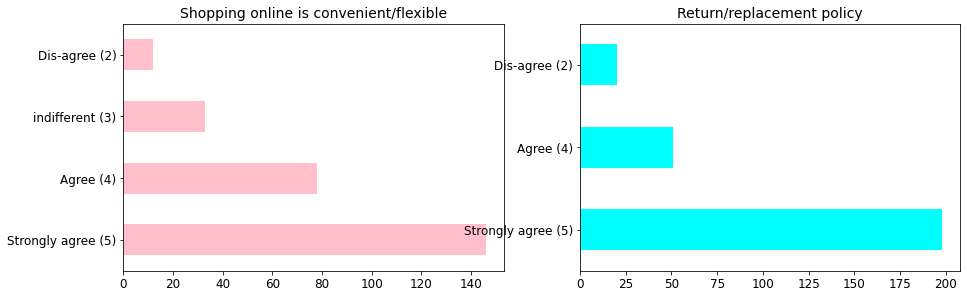

In [970]:
#32 Shopping online is convenient and flexible
plt.subplot(2,2,1)
adf['convence_flexiblity'].value_counts().plot(kind = "barh",fontsize=12,figsize=(15,10),color = 'pink')
plt.title("Shopping online is convenient/flexible", fontsize=14)

#33 Return and replacement policy of the e-tailer is important for purchase decision
plt.subplot(2,2,2)
adf['Return/replacement_policy'].value_counts().plot(kind = "barh",fontsize=12,figsize=(15,10),color ='aqua')
plt.title("Return/replacement policy", fontsize=14)


*Observation :*
<br>*In convence_flexiblity max people beleive Shopping online is convenient and flexible*
<br>*In Return/replacement_policy max people stronly agree Return and replacement policy of the 
e-tailer is important for purchase decision*

Text(0.5, 1.0, 'Information improves customers satisfaction')

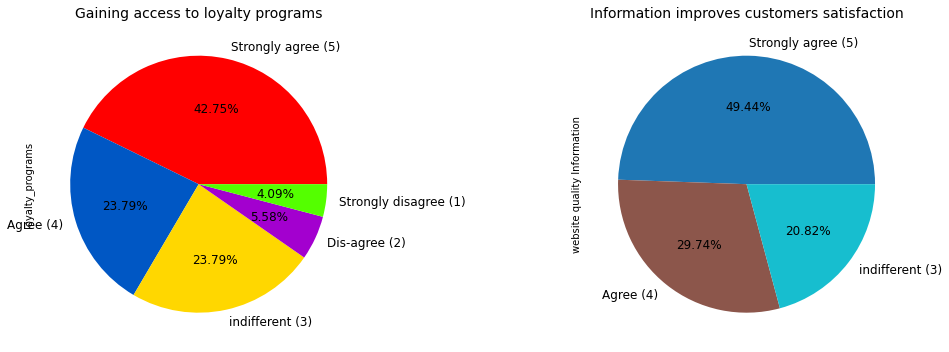

In [971]:
#34 Gaining access to loyalty programs is a benefit of shopping online
plt.subplot(2,2,1)
adf['loyalty_programs'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='prism')
plt.title("Gaining access to loyalty programs", fontsize=14)

#35 Displaying quality Information on the website improves satisfaction of customers
plt.subplot(2,2,2)
adf['website quality Information'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='tab10')
plt.title("Information improves customers satisfaction", fontsize=14)

*Observation :*
<br>*In loyalty_programs column max people 42% strongly agree/23% agree Gaining access to loyalty programs is a benefit of shopping online*
<br>*In website quality Information column max people 49% strongly agree/29% agree  Displaying quality Information on the website 
improves satisfaction of customers*

Text(0.5, 1.0, 'Net Benefit derived users satisfaction')

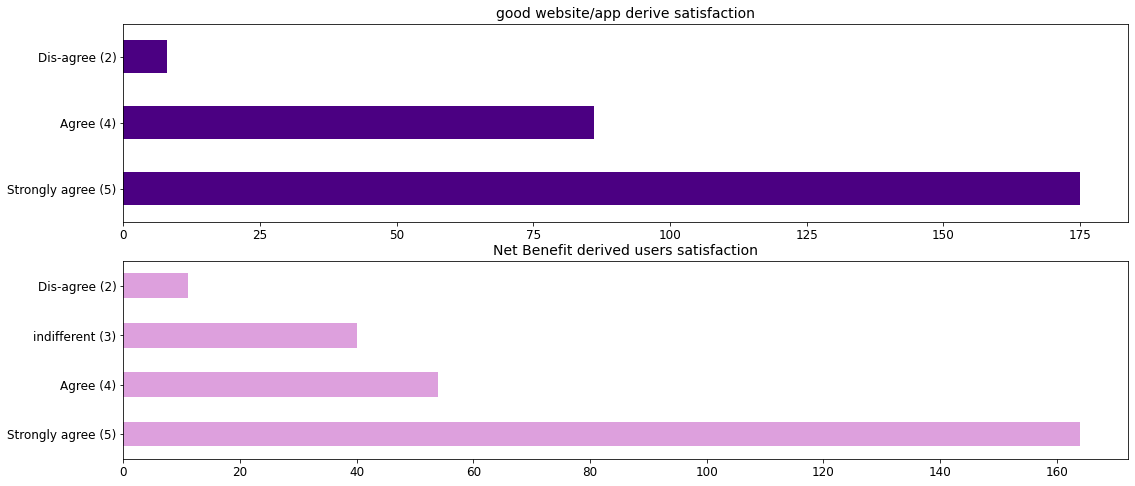

In [972]:
#36 User derive satisfaction while shopping on a good quality website or application
plt.subplot(2,1,1)
adf['website/app Qulity'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,8),color='indigo')
plt.title("good website/app derive satisfaction", fontsize=14)

#37 Net Benefit derived from shopping online can lead to users satisfaction
plt.subplot(2,1,2)
adf['Net Benefit'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,8),color='plum')
plt.title("Net Benefit derived users satisfaction", fontsize=14)


*Observation :*
<br>*In website/app Qulity column max people strongly agree/agree
User derive satisfaction while shopping on a good quality website or application*
<br>*In Net Benefit column max people strongly agree/agree  Net Benefit derived from 
shopping online can lead to users satisfaction*

Text(0.5, 1.0, 'wide variety of listed product')

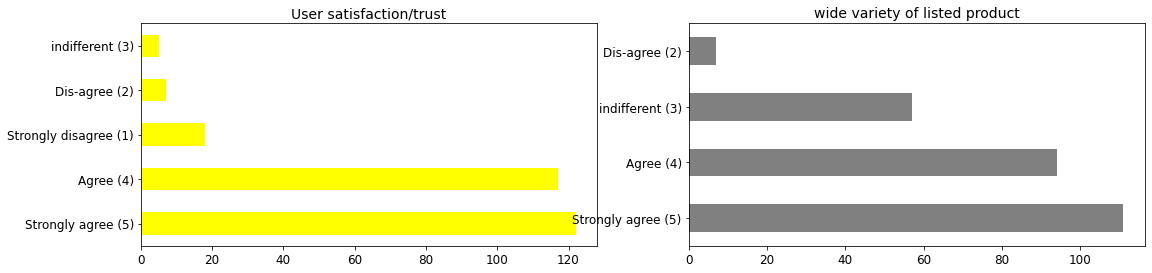

In [973]:
#38 User satisfaction cannot exist without trust
plt.subplot(2,2,1)
adf['trust'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,9),color ='yellow')
plt.title("User satisfaction/trust", fontsize=14)

#39 Offering a wide variety of listed product in several category
plt.subplot(2,2,2)
adf['product category'].value_counts().plot(kind = "barh",fontsize=12,figsize=(18,9),color = 'grey')
plt.title("wide variety of listed product", fontsize=14)


*Observation :*
<br>*In trust column max people strongly agree/agree that User satisfaction cannot exist without trust*
<br>*In product category column max people strongly agree/agree that Offering a wide variety of 
listed product in several category*

Text(0.5, 1.0, 'Monetary_savings')

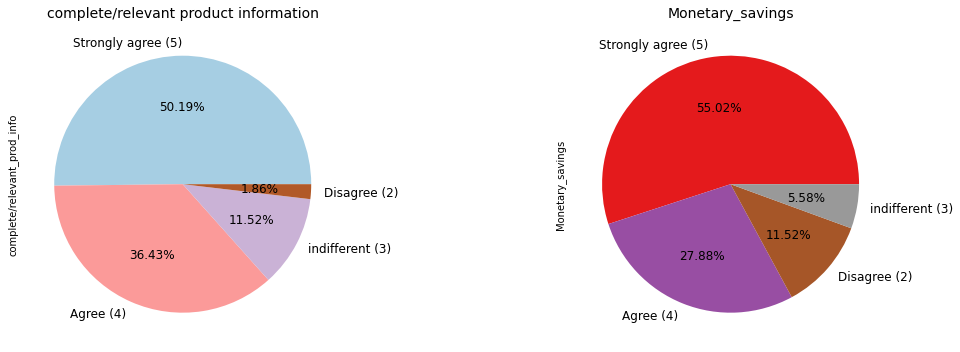

In [974]:
#40 Provision of complete and relevant product information
plt.subplot(2,2,1)
adf['complete/relevant_prod_info'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='Paired')
plt.title("complete/relevant product information", fontsize=14)

#41 Monetary savings
plt.subplot(2,2,2)
adf['Monetary_savings'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,13),colormap='Set1')
plt.title("Monetary_savings", fontsize=14)


*Observation :*
<br>*In complete/relevant_prod_info column max people 50% strongly agree/36% agree that provision of complete and relevant product information is necessary*
<br>*In Monetary_savings column max people 55% strongly agree/27% agree  with Monetary savings*

Text(0.5, 1.0, 'sense of adventure')

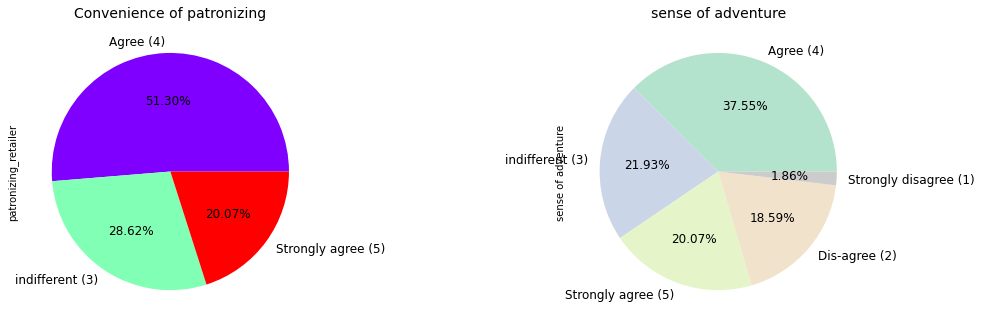

In [975]:
#42 The Convenience of patronizing the online retailer
plt.subplot(2,2,1)
adf['patronizing_retailer'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='rainbow')
plt.title("Convenience of patronizing", fontsize=14)

#43 Shopping on the website gives you the sense of adventure
plt.subplot(2,2,2)
adf['sense of adventure'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='Pastel2')
plt.title("sense of adventure", fontsize=14)


*Observation :*
<br>*In patronizing_retailer column max people 20% strongly agree/51% agree that The Convenience of patronizing the online retailer is necessary*
<br>*In sense of adventure column max people 20% strongly agree/37% agree  Shopping on the website gives you the sense of adventure*

Text(0.5, 1.0, 'gratification shopping on your favorite e-tailer')

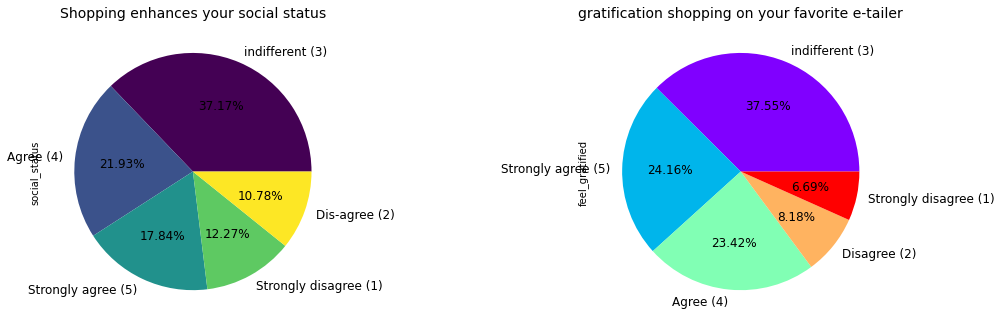

In [976]:
#44 Shopping on your preferred e-tailer enhances your social status
plt.subplot(2,2,1)
adf['social_status'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='viridis')
plt.title("Shopping enhances your social status", fontsize=14)

#45 You feel gratification shopping on your favorite e-tailer
plt.subplot(2,2,2)
adf['feel_gratified'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='rainbow')
plt.title("gratification shopping on your favorite e-tailer", fontsize=14)


*Observation :*
<br>*In social_status column 21% agree/17% strong agree that Shopping on your preferred e-tailer enhances your social status*
<br>*but 12% strongly disagree/ 10% disagree and 37% have indifference opinion*
<br>*In feel_gratified  column 23% agree/24% strong agree that people feel gratification shopping on your favorite e-tailer*
<br>*but 8% disagree/6% strong disagree and 37% have indifferent opinion*

Text(0.5, 1.0, 'Getting value for money spent')

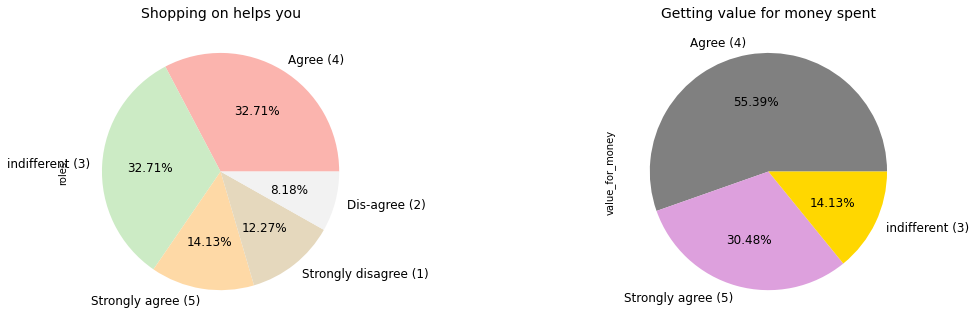

In [977]:
#46 Shopping on the website helps you fulfill certain roles
plt.subplot(2,2,1)
adf['roles'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colormap='Pastel1')
plt.title("Shopping on helps you", fontsize=14)

#47 Getting value for money spent
plt.subplot(2,2,2)
adf['value_for_money'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(18,12),colors = ['grey','plum','gold'])
plt.title("Getting value for money spent", fontsize=14)


*Observation :*
<br>*In roles column 21% agree/17% strong agree that Shopping on the website helps you fulfill certain roles*
<br>*but 12% strongly disagree/ 10% disagree and 37% have indifference opinion*
<br>*In value_for_money  column 23% agree/24% strong agree that Getting value for money spent*
<br>*but 8% disagree/6% strong disagree and 37% have indifferent opinion*

Text(0.5, 1.0, 'Easy to use website/app')

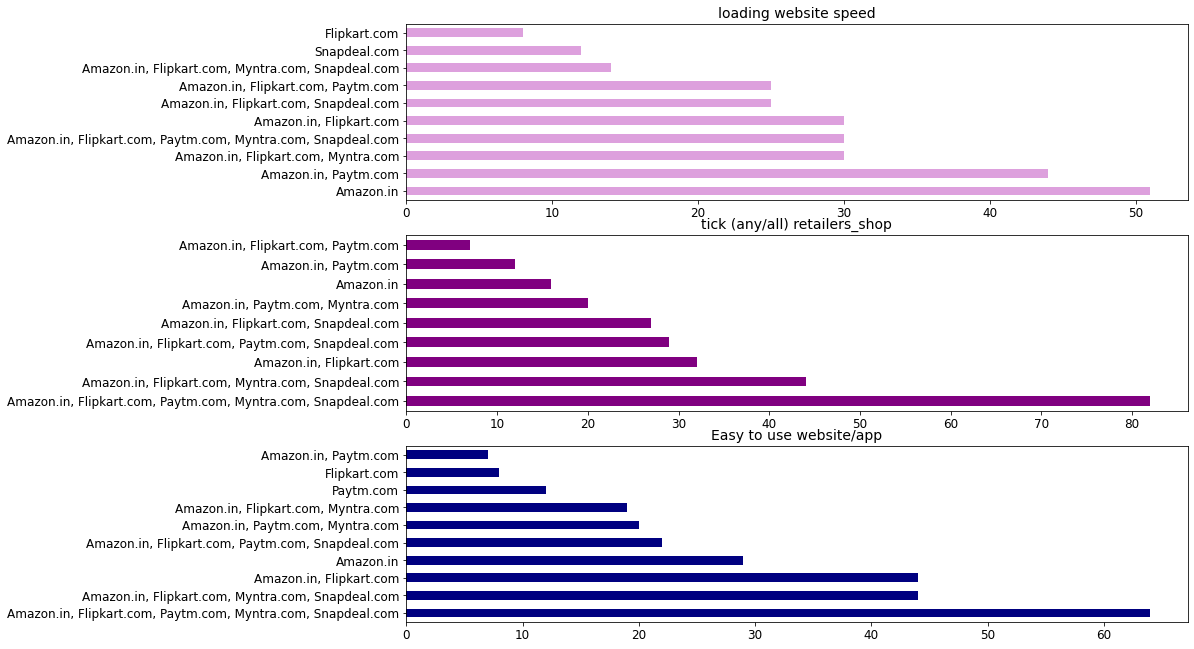

In [978]:
#Fast loading website speed of website and application
plt.subplot(3,1,1)
adf['load_speed_of_web/app'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,11),color ='plum')
plt.title("loading website speed", fontsize=14)

#From the following, tick any (or all) of the online retailers you have shopped from;
plt.subplot(3,1,2)
adf['tick_retailers'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,11),color ='purple')
plt.title("tick (any/all) retailers_shop", fontsize=14)

#Easy to use website or application
plt.subplot(3,1,3)
adf['Easyness_of_web/app'].value_counts().plot(kind ="barh",fontsize=12,figsize=(14,11),color = 'navy')
plt.title("Easy to use website/app", fontsize=14)

*Observation :*
<br>*In load_speed_of_web/app column Amazon have max fast loading speed*
<br>*In tick_retailers column amazon,flipkart,paytm,Myntra,snapdeal have max ticks*
<br>*In Easyness_of_web/ap  column amazon,flipkart,paytm,Myntra,snapdeal web/app are easy to use*

Text(0.5, 1.0, 'description information of products')

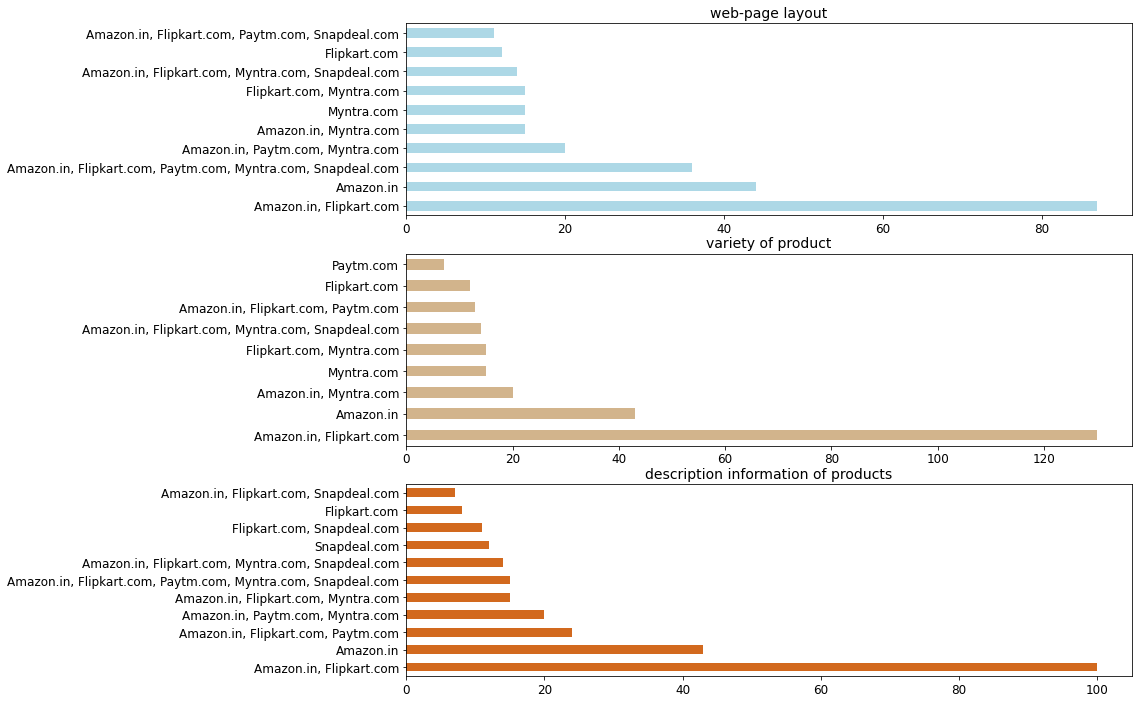

In [979]:
#Visual appealing web-page layout
plt.subplot(3,1,1)
adf['web-page layout'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color ='lightblue')
plt.title("web-page layout", fontsize=14)

#Wild variety of product on offer
plt.subplot(3,1,2)
adf['product on offer'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color ='tan')
plt.title("variety of product", fontsize=14)

#Complete, relevant description information of products
plt.subplot(3,1,3)
adf['description_Prod_info'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color ='chocolate')
plt.title("description information of products", fontsize=14)

*Observation :*
<br>*In web-page layout column max people think Amazon,flipkart have visual appealing layout*
<br>*In product on offer column max people think Amazon,flipkart have variety of product offered*
<br>*In description_Prod_info column max people think Amazon,flipkart have complete, relevant description information of products*

Text(0.5, 1.0, 'Quickness to complete purchase')

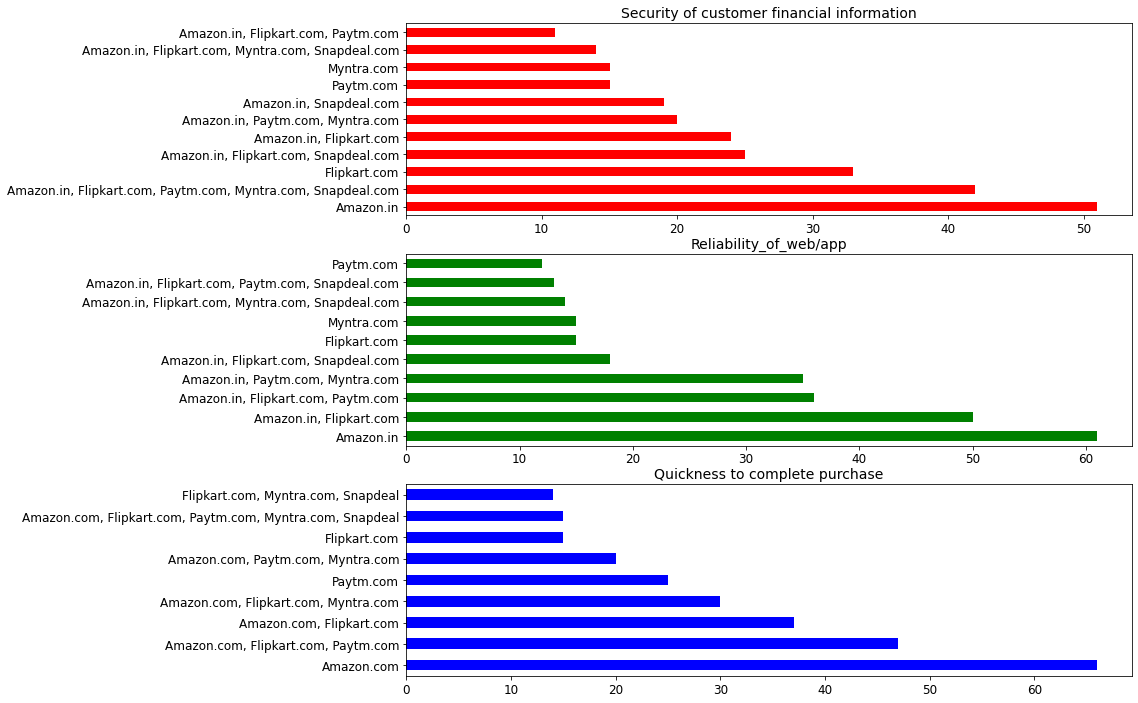

In [980]:
#Security of customer financial information
plt.subplot(3,1,1)
adf['financial_Security'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color = 'red')
plt.title("Security of customer financial information", fontsize=14)

#Reliability of the website or application
plt.subplot(3,1,2)
adf['Reliability_of_web/app'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color = 'green')
plt.title("Reliability_of_web/app", fontsize=14)

#Quickness to complete purchase
plt.subplot(3,1,3)
adf['Quickness_complete_purchase'].value_counts().plot(kind = "barh",fontsize=12,figsize=(13,12),color='blue')
plt.title("Quickness to complete purchase", fontsize=14)



*Observation :*
<br>*In financial_Security column  Amazon have highest Security of customer financial information*
<br>*paytm,myntra,flipkart,snapdeal is 2nd highest*
<br>*In Reliability_of_web/app column  Amazon have highest Reliability of the website or application*
<br>*flipkart is 2nd highest and paytm,myntra 3rd highest*
<br>*In Quickness_complete_purchase column Amazon gives highest speed to complete purchase*
<br>*paytm,flipkart is 2nd highest*

Text(0.5, 1.0, 'Privacy of customers’ information')

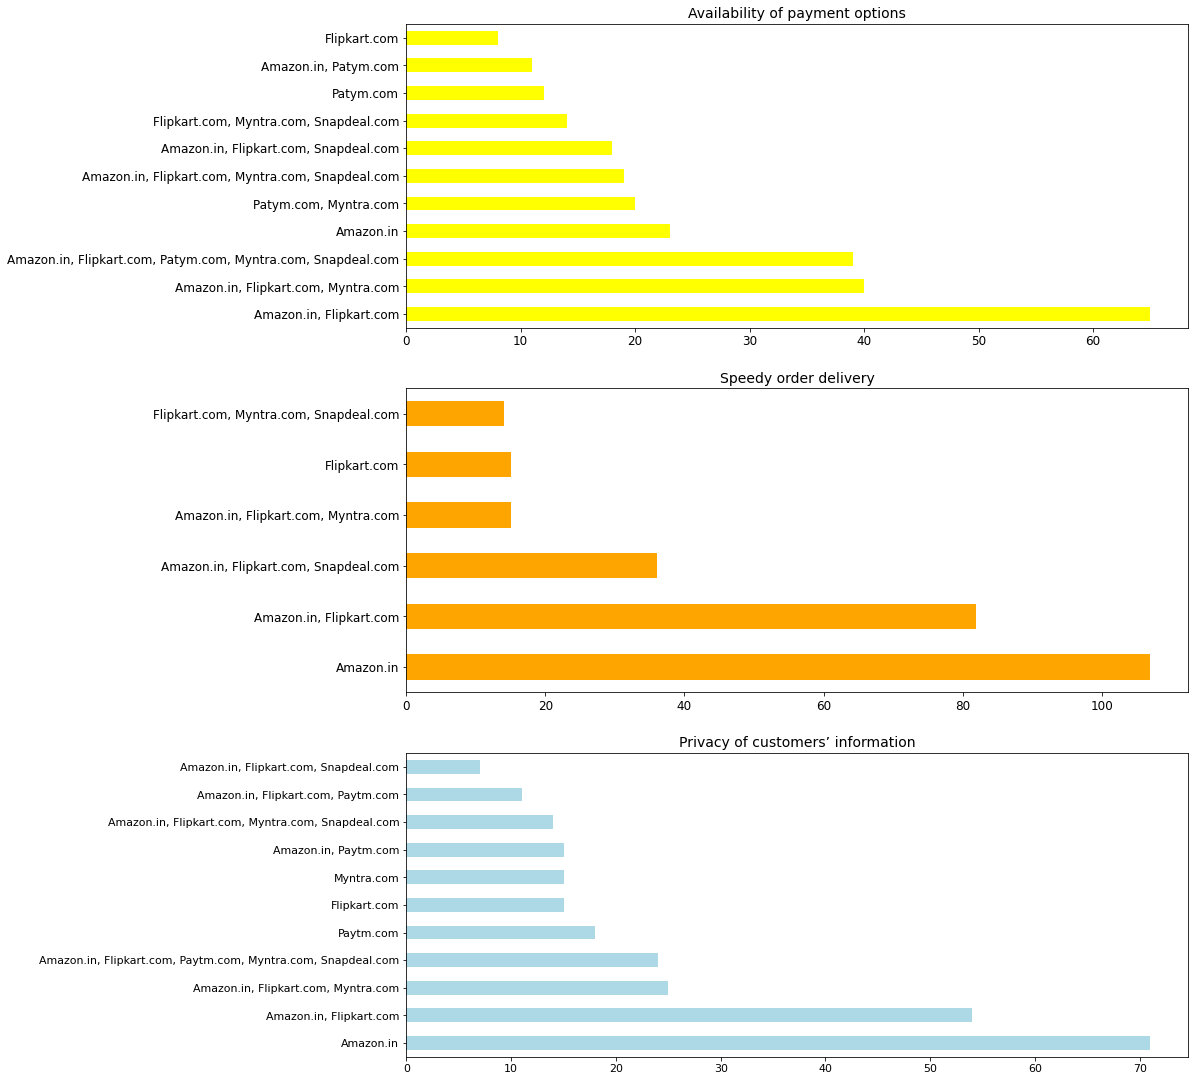

In [981]:
#Availability of several payment options
plt.subplot(3,1,1)
adf['Available_payment_options'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,11),color ='yellow')
plt.title("Availability of payment options", fontsize=14)

#Speedy order delivery
plt.subplot(3,1,2)
adf['Speedy_order_delivery'].value_counts().plot(kind ="barh",fontsize=12,figsize=(14,11),color ='orange')
plt.title("Speedy order delivery", fontsize=14)

#Privacy of customers’ information
plt.subplot(3,1,3)
adf['Privacy of customers’ information'].value_counts().plot(kind = "barh",fontsize=11,figsize=(14,19),color ='lightblue')
plt.title("Privacy of customers’ information", fontsize=14)

*Observation :*
<br>*In Available_payment_options column  Amazon,flipkart have highest Availability of several payment options*
<br>*In Speedy_order_delivery column  Amazon have highest Speedy order delivery*
<br>*In Privacy of customers’ information column Amazon gives highest Privacy of customers’ information*
<br>*flipkart is 2nd highest*

Text(0.5, 1.0, 'online assistance through multi-channel')

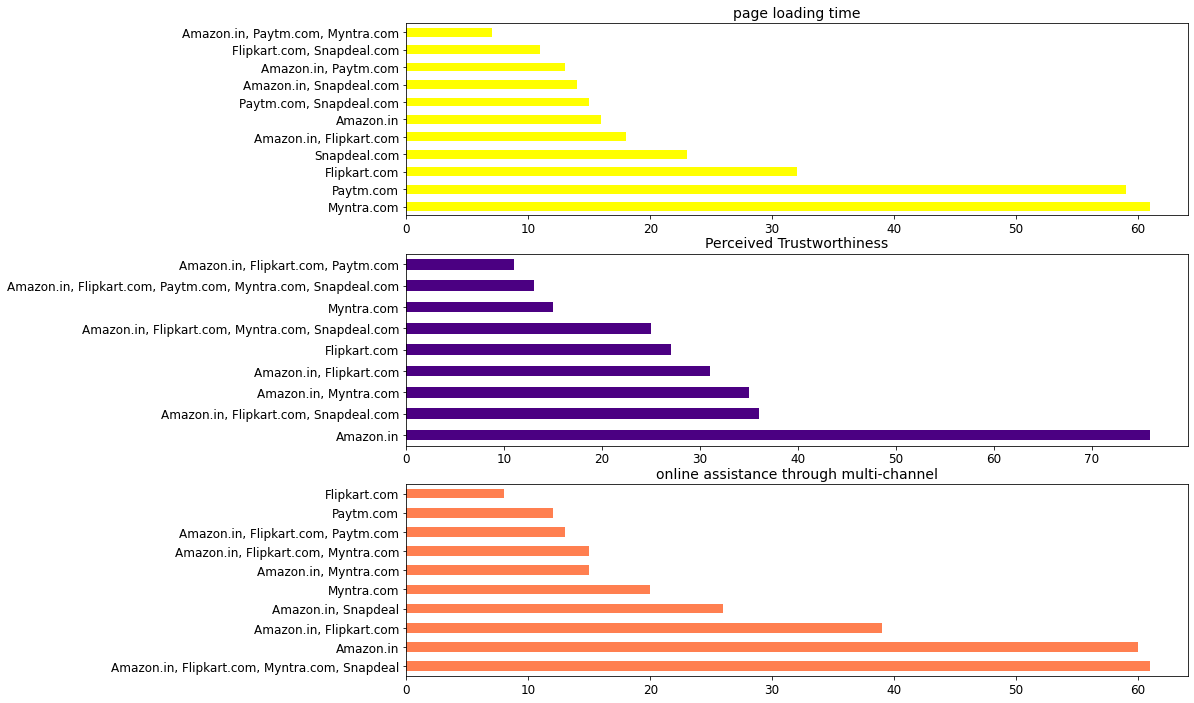

In [982]:
#Longer page loading time (promotion, sales period)
plt.subplot(3,1,1)
adf['loading time (promotion/sales)'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color='yellow')
plt.title("page loading time", fontsize=14)

#Perceived Trustworthiness
plt.subplot(3,1,2)
adf['Trustworthiness'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color='indigo')
plt.title("Perceived Trustworthiness", fontsize=14)

#Presence of online assistance through multi-channel
plt.subplot(3,1,3)
adf['online assistance'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color='coral')
plt.title("online assistance through multi-channel", fontsize=14)


*Observation :*
<br>*In loading time (promotion/sales) column  Myntra,Paytm take max Longer page loading time (during promotion, sales period)*
<br>*In Trustworthiness column  Amazon have highest Perceived Trustworthiness*
<br>*In online assistance column Amazon.flipkart,Myntra,Snapdeal gives max Presence of online assistance through multi-channel*

Text(0.5, 1.0, 'Late declaration of price')

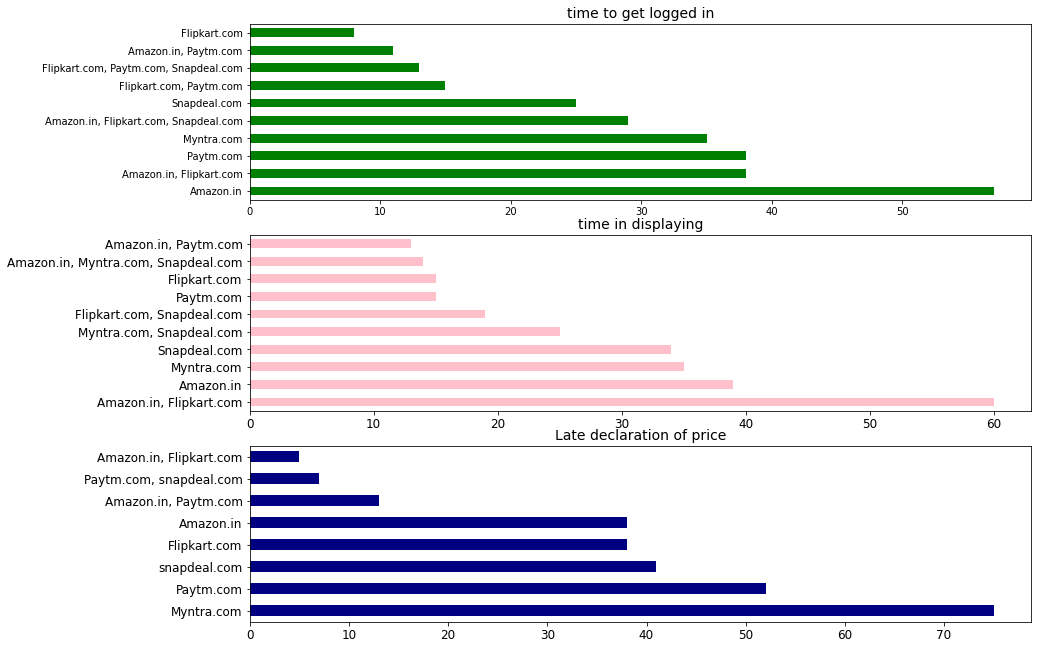

In [983]:
#Longer time to get logged in (promotion, sales period)
plt.subplot(3,1,1)
adf['loggedin_time(promotion/sales)'].value_counts().plot(kind = "barh",figsize=(14,11),color='green')
plt.title("time to get logged in", fontsize=14)

#Longer time in displaying graphics and photos (promotion, sales period)
plt.subplot(3,1,2)
adf['display_time(promotion/sales)'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,11),color='pink')
plt.title("time in displaying", fontsize=14)

#Late declaration of price (promotion, sales period)
plt.subplot(3,1,3)
adf['price declaration(promotion/sales)'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,11),color = 'navy')
plt.title("Late declaration of price", fontsize=14)

*Observation :*
<br>*In loggedin_time(promotion/sales) column  Amazon take max Longer time to get logged in (during promotion, sales period)*
<br>*In display_time(promotion/sales) column  Amazon,flipkart take Longer time in displaying graphics and photos (during promotion, sales period)*
<br>*In price declaration(promotion/sales) column Myntra gives Late price declaration(during promotion, sales period)*

Text(0.5, 1.0, 'Longer delivery period')

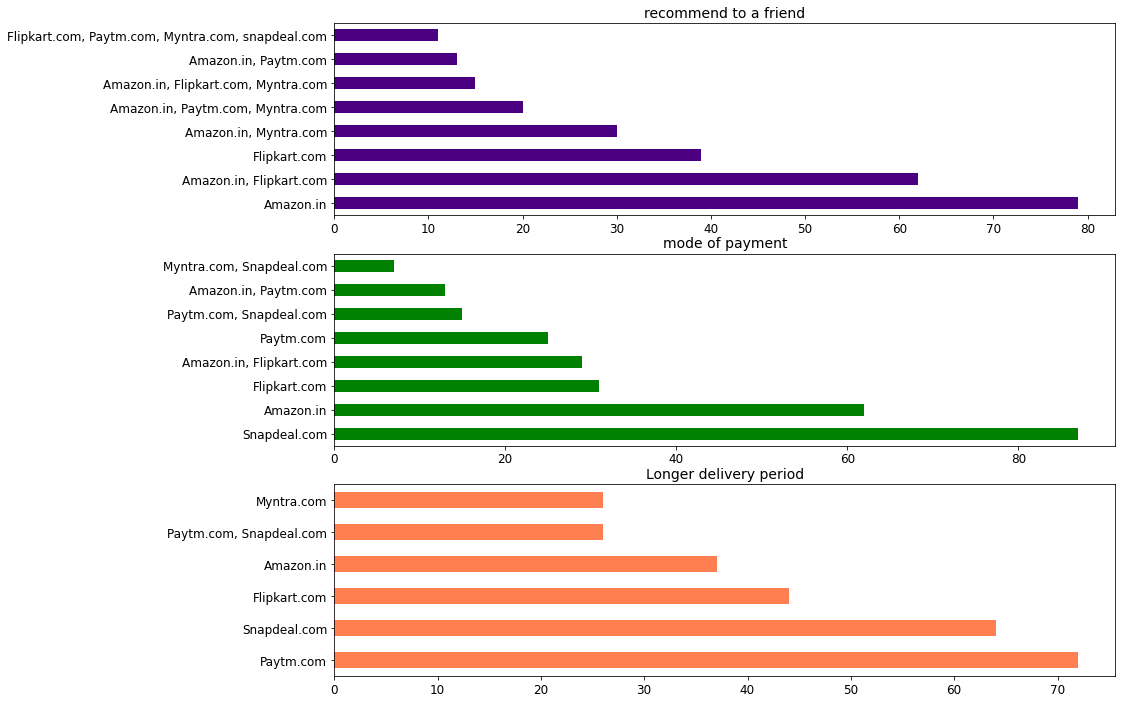

In [984]:
#Which of the Indian online retailer would you recommend to a friend?
plt.subplot(3,1,1)
adf['recommendation'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color = 'indigo')
plt.title("recommend to a friend", fontsize=14)

#Limited mode of payment on most products (promotion, sales period)
plt.subplot(3,1,2)
adf['payment_mode(promotion/sales)'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color ='green')
plt.title("mode of payment", fontsize=14)

#Longer delivery period
plt.subplot(3,1,3)
adf['Longer delivery period'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color = 'coral')
plt.title("Longer delivery period", fontsize=14)


*Observation :*
<br>*In recommendation column  Amazon online retailer is max recommend to a friendand flipkart is 2nd max*
<br>*In payment_mode(promotion/sales) column  snapdeal have Limited mode of payment on most products(during promotion, sales period)*
<br>*In Longer delivery period column paytm,snapdeal take longer delivery period*

Text(0.5, 1.0, 'Website_efficient_as_before')

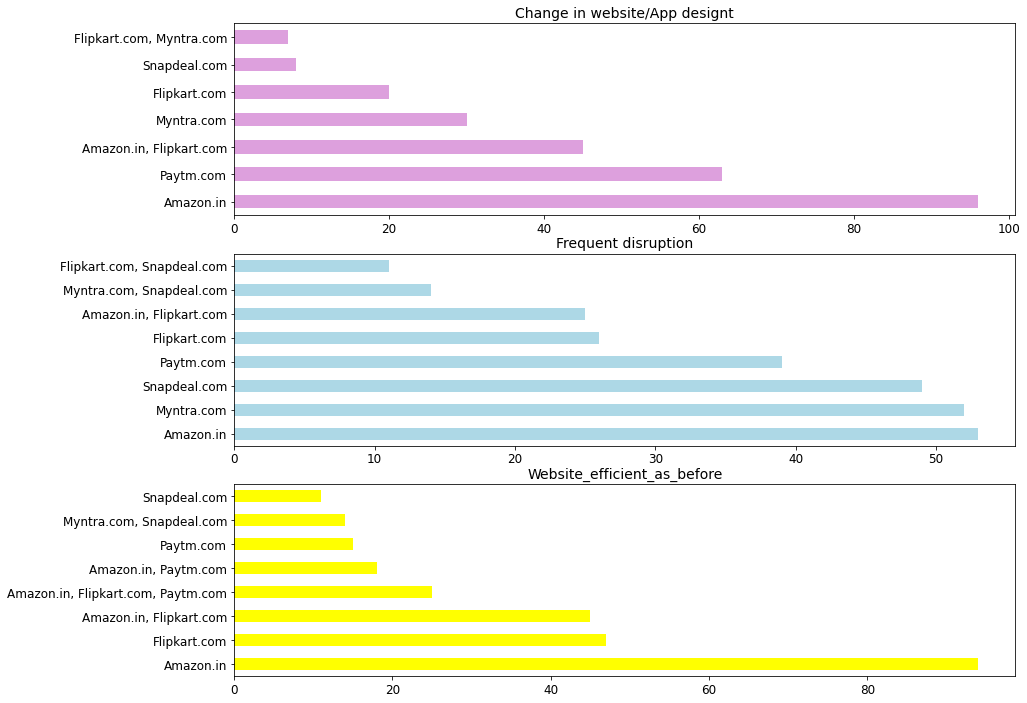

In [985]:
#Change in website/Application design
plt.subplot(3,1,1)
adf['Change in web/App design'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color ='plum')
plt.title("Change in website/App designt", fontsize=14)

#Frequent disruption when moving from one page to another
plt.subplot(3,1,2)
adf['Frequent_disruption'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color = 'lightblue')
plt.title("Frequent disruption", fontsize=14)

#Website is as efficient as before
plt.subplot(3,1,3)
adf['Website_efficience'].value_counts().plot(kind = "barh",fontsize=12,figsize=(14,12),color = 'yellow')
plt.title("Website_efficient_as_before", fontsize=14)

*Observation :*
<br>*In Change in web/App design column  Amazon max Change in website/Application design*
<br>*In Frequent_disruption column Amazon,Myntra,Snapdeal have max Frequent disruption when moving from one page to another*
<br>*In Website_efficience column Amazon Website is max as efficient as before and 2nd max is flipkart*

###### Encoded Categorical Variable

In [105]:
le=LabelEncoder()
adf['Gender']=le.fit_transform(adf['Gender'])
adf['City_of_purchase']=le.fit_transform(adf['City_of_purchase'])
adf['Age']=le.fit_transform(adf['Age'])
adf['years_shopping_online']=le.fit_transform(adf['years_shopping_online'])
adf['Device_used']=le.fit_transform(adf['Device_used'])
adf['Device_Screensize']=le.fit_transform(adf['Device_Screensize'])
adf['Device_OS']=le.fit_transform(adf['Device_OS'])
adf['Browser_used']=le.fit_transform(adf['Browser_used'])
adf['Channel_used']=le.fit_transform(adf['Channel_used'])
adf['reached_retailstore_After_1stvisit']=le.fit_transform(adf['reached_retailstore_After_1stvisit'])
adf['before_purchase_exploreTime']=le.fit_transform(adf['before_purchase_exploreTime'])
adf['payment_Option']=le.fit_transform(adf['payment_Option'])
adf['abandon_frequency']=le.fit_transform(adf['abandon_frequency'])
adf['abandon_reason']=le.fit_transform(adf['abandon_reason'])
adf['website_content']=le.fit_transform(adf['website_content'])
adf['Product Information']=le.fit_transform(adf['Product Information'])
adf['seller/product_information']=le.fit_transform(adf['seller/product_information'])
adf['Product relevant information']=le.fit_transform(adf['Product relevant information'])
adf['Website_Naigation']=le.fit_transform(adf['Website_Naigation'])
adf['Loading_speed']=le.fit_transform(adf['Loading_speed'])
adf['User_friendly_UI']=le.fit_transform(adf['User_friendly_UI'])
adf['Convenient_paymnet_method']=le.fit_transform(adf['Convenient_paymnet_method'])
adf['Trusted_stipulated_time']=le.fit_transform(adf['Trusted_stipulated_time'])
adf['cust_query_assistance']=le.fit_transform(adf['cust_query_assistance'])
adf['customer_privacy']=le.fit_transform(adf['customer_privacy'])
adf['communication_channels']=le.fit_transform(adf['communication_channels'])
adf['benefit/discounts']=le.fit_transform(adf['benefit/discounts'])
adf['Enjoyment']=le.fit_transform(adf['Enjoyment'])
adf['convence_flexiblity']=le.fit_transform(adf['convence_flexiblity'])
adf['Return/replacement_policy']=le.fit_transform(adf['Return/replacement_policy'])
adf['loyalty_programs']=le.fit_transform(adf['loyalty_programs'])
adf['website quality Information']=le.fit_transform(adf['website quality Information'])
adf['website/app Qulity']=le.fit_transform(adf['website/app Qulity'])
adf['Net Benefit']=le.fit_transform(adf['Net Benefit'])
adf['trust']=le.fit_transform(adf['trust'])
adf['product category']=le.fit_transform(adf['product category'])
adf['complete/relevant_prod_info']=le.fit_transform(adf['complete/relevant_prod_info'])
adf['Monetary_savings']=le.fit_transform(adf['Monetary_savings'])
adf['patronizing_retailer']=le.fit_transform(adf['patronizing_retailer'])
adf['sense of adventure']=le.fit_transform(adf['sense of adventure'])
adf['social_status']=le.fit_transform(adf['social_status'])
adf['feel_gratified']=le.fit_transform(adf['feel_gratified'])
adf['roles']=le.fit_transform(adf['roles'])
adf['value_for_money']=le.fit_transform(adf['value_for_money'])

adf.Internet_type.replace({'Dial-up':1,'Wi-Fi':2,'Mobile Internet':3,'Mobile internet':3},inplace=True)
adf.purchase_per_year.replace({'41 times and above':1,'42 times and above':1,'31-40 times':2,'21-30 times':3,'11-20 times':4,'Less than 10 times':5},inplace=True)


In [106]:
adf.tick_retailers.replace({'Amazon.in, Paytm.com':12,'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,
        'Amazon.in, Paytm.com, Myntra.com':124,'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,
        'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com':1325,'Amazon.in, Flipkart.com':13, 'Amazon.in':1,
        'Amazon.in, Flipkart.com, Snapdeal.com':135, 'Amazon.in, Flipkart.com, Paytm.com':32},inplace=True)

adf['Easyness_of_web/app'].replace({'Paytm.com':2,'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,
       'Amazon.in, Paytm.com, Myntra.com':124,'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,
       'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com':1325, 'Amazon.in, Flipkart.com':13, 'Amazon.in':1,
        'Amazon.in, Flipkart.com, Myntra.com':134, 'Amazon.in, Paytm.com':12, 'Flipkart.com':1},inplace=True)

adf['web-page layout'].replace({'Flipkart.com':3, 'Amazon.in, Myntra.com':14,'Amazon.in, Paytm.com, Myntra.com':124,
       'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,'Myntra.com':4, 'Amazon.in, Flipkart.com':13,
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com':1325,
       'Flipkart.com, Myntra.com':34, 'Amazon.in':1},inplace=True)


adf['product on offer'].replace({'Flipkart.com':3, 'Flipkart.com, Myntra.com':34,'Amazon.in, Myntra.com':14, 
     'Amazon.in, Flipkart.com':13, 'Myntra.com':4, 'Amazon.in, Flipkart.com, Paytm.com':132, 'Amazon.in':2,
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345, 'Paytm.com':2},inplace=True)

adf['description_Prod_info'].replace({'Snapdeal.com':5, 'Amazon.in, Flipkart.com, Myntra.com':134,'Amazon.in':1,
    'Amazon.in, Paytm.com, Myntra.com':124, 'Amazon.in, Flipkart.com':13,'Flipkart.com, Snapdeal.com':35,
    'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,'Amazon.in, Flipkart.com, Paytm.com':132, 
    'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,'Amazon.in, Flipkart.com, Snapdeal.com':135,'Flipkart.com':3},inplace=True)

adf['load_speed_of_web/app'].replace({'Snapdeal.com':5, 'Amazon.in, Flipkart.com, Myntra.com':134,'Amazon.in, Paytm.com':12,
    'Amazon.in, Flipkart.com, Snapdeal.com':135,'Amazon.in':1,'Amazon.in, Flipkart.com, Paytm.com':132,
    'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,'Amazon.in, Flipkart.com':13, 'Flipkart.com':3,
    'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,},inplace=True)


adf['Reliability_of_web/app'].replace({'Paytm.com':2, 'Myntra.com':4, 'Amazon.in, Paytm.com, Myntra.com':124,
       'Amazon.in, Flipkart.com, Paytm.com':132,'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com':1325,
       'Amazon.in, Flipkart.com, Snapdeal.com':135, 'Amazon.in':1,'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,
       'Amazon.in, Flipkart.com':13, 'Flipkart.com':3},inplace=True)

adf['Quickness_complete_purchase'].replace({'Paytm.com':2, 'Amazon.com, Flipkart.com, Myntra.com':134,'Amazon.com':1, 
       'Amazon.com, Paytm.com, Myntra.com':124, 'Amazon.com, Flipkart.com, Paytm.com':132,'Flipkart.com':3,
       'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal':13245,'Amazon.com, Flipkart.com':13,
       'Flipkart.com, Myntra.com, Snapdeal':345 },inplace=True)

adf['Available_payment_options'].replace({'Patym.com':2,'Amazon.in, Flipkart.com, Myntra.com':134,'Flipkart.com':3,
       'Patym.com, Myntra.com':24,'Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com':13245,'Amazon.in':1,
       'Amazon.in, Flipkart.com, Snapdeal.com':135, 'Amazon.in, Flipkart.com':13,'Amazon.in, Patym.com':12,
       'Flipkart.com, Myntra.com, Snapdeal.com':345,'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345 },inplace=True)

adf['Speedy_order_delivery'].replace({'Amazon.in':1, 'Amazon.in, Flipkart.com':13,'Amazon.in, Flipkart.com, Snapdeal.com':135,
    'Flipkart.com, Myntra.com, Snapdeal.com':345,'Amazon.in, Flipkart.com, Myntra.com':134, 'Flipkart.com':3},inplace=True)

adf['Privacy of customers’ information'].replace({'Amazon.in':1,'Myntra.com':4,'Amazon.in, Flipkart.com, Myntra.com':134,
       'Amazon.in, Paytm.com':12,'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,'Paytm.com':2, 
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,'Amazon.in, Flipkart.com':13, 'Flipkart.com':3,
       'Amazon.in, Flipkart.com, Paytm.com':132, 'Amazon.in, Flipkart.com, Snapdeal.com':135},inplace=True)

adf['financial_Security'].replace({'Amazon.in':1, 'Myntra.com':4, 'Amazon.in, Paytm.com, Myntra.com':124,'Paytm.com':2,
       'Amazon.in, Flipkart.com, Snapdeal.com':135, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,
       'Flipkart.com':3,'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,'Amazon.in, Flipkart.com':13, 
       'Amazon.in, Flipkart.com, Paytm.com':132,'Amazon.in, Snapdeal.com':15},inplace=True)

adf['Trustworthiness'].replace({'Flipkart.com':3, 'Myntra.com':4, 'Amazon.in, Myntra.com':14,'Amazon.in, Flipkart.com':13, 
    'Amazon.in, Flipkart.com, Snapdeal.com':135,'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com':13245,
    'Amazon.in':1, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com':1345,'Amazon.in, Flipkart.com, Paytm.com':132},inplace=True)

adf['online assistance'].replace({'Paytm.com':2, 'Amazon.in, Flipkart.com, Myntra.com':134, 'Myntra.com':4,'Flipkart.com':1,
       'Amazon.in, Flipkart.com, Myntra.com, Snapdeal':1345, 'Amazon.in, Myntra.com':14, 'Amazon.in, Flipkart.com':13,
       'Amazon.in, Flipkart.com, Paytm.com':132,'Amazon.in':1,  'Amazon.in, Snapdeal':15,},inplace=True)

adf['loggedin_time(promotion/sales)'].replace({'Amazon.in':1, 'Amazon.in, Flipkart.com':13, 'Myntra.com':4,'Snapdeal.com':5,
        'Flipkart.com, Paytm.com':32,'Flipkart.com, Paytm.com, Snapdeal.com':325,'Paytm.com':2,'Amazon.in, Paytm.com':12,
       'Amazon.in, Flipkart.com, Snapdeal.com':135,  'Flipkart.com':3},inplace=True)

adf['display_time(promotion/sales)'].replace({'Amazon.in':1,'Myntra.com':4,'Myntra.com, Snapdeal.com':45, 'Paytm.com':2,
       'Amazon.in, Paytm.com':12, 'Amazon.in, Flipkart.com':13,'Amazon.in, Myntra.com, Snapdeal.com':145,'Snapdeal.com':5,
       'Flipkart.com, Snapdeal.com':35, 'Flipkart.com':3},inplace=True)

adf['price declaration(promotion/sales)'].replace({'Flipkart.com':3,'snapdeal.com':5,'Myntra.com':4,'Paytm.com':2,
       'Amazon.in, Paytm.com':12, 'Amazon.in':1, 'Paytm.com, snapdeal.com':25,'Amazon.in, Flipkart.com':13},inplace=True)

adf['loading time (promotion/sales)'].replace({'Flipkart.com':3, 'Snapdeal.com':5, 'Myntra.com':4, 'Paytm.com':2,
    'Amazon.in, Paytm.com':12, 'Amazon.in, Flipkart.com':13,'Amazon.in, Snapdeal.com':15, 'Flipkart.com, Snapdeal.com':35,
    'Paytm.com, Snapdeal.com':25, 'Amazon.in':1, 'Amazon.in, Paytm.com, Myntra.com':124},inplace=True)

adf['payment_mode(promotion/sales)'].replace({'Amazon.in':1,'Snapdeal.com':5,'Paytm.com':2,'Amazon.in, Paytm.com':12,
    'Flipkart.com':3,'Amazon.in, Flipkart.com':13,'Paytm.com, Snapdeal.com':25,'Myntra.com, Snapdeal.com':45},inplace=True)

adf['Longer delivery period'].replace({'Paytm.com':2, 'Snapdeal.com':5, 'Flipkart.com':3, 'Amazon.in':1,'Myntra.com':4,
       'Paytm.com, Snapdeal.com':25 },inplace=True)

adf['Change in web/App design'].replace({'Flipkart.com':3, 'Amazon.in':1, 'Paytm.com':2,'Amazon.in, Flipkart.com':13,
        'Myntra.com':4, 'Snapdeal.com':5,'Flipkart.com, Myntra.com':34},inplace=True)

adf['Frequent_disruption'].replace({'Amazon.in':1,'Myntra.com':4,'Paytm.com':2,'Amazon.in, Flipkart.com':13,
       'Snapdeal.com':5, 'Flipkart.com':3, 'Myntra.com, Snapdeal.com':45,'Flipkart.com, Snapdeal.com':35},inplace=True)

adf['Website_efficience'].replace({'Amazon.in':1, 'Amazon.in, Flipkart.com':13,'Amazon.in, Flipkart.com, Paytm.com':132, 
     'Paytm.com':2,'Snapdeal.com':5,'Myntra.com, Snapdeal.com':45,'Flipkart.com':3,'Amazon.in, Paytm.com':12},inplace=True)

adf['recommendation'].replace({'Flipkart.com':3,'Amazon.in, Myntra.com':14,'Amazon.in, Paytm.com, Myntra.com':124, 
        'Amazon.in, Flipkart.com':13,'Amazon.in, Paytm.com':12, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com':3245, 
        'Amazon.in':1,'Amazon.in, Flipkart.com, Myntra.com':134},inplace=True)


In [107]:
adf.head()

,Gender,Age,City_of_purchase,Pincode,years_shopping_online,purchase_per_year,Internet_type,Device_used,Device_Screensize,Device_OS,Browser_used,Channel_used,reached_retailstore_After_1stvisit,before_purchase_exploreTime,payment_Option,abandon_frequency,abandon_reason,website_content,Product Information,seller/product_information,Product relevant information,Website_Naigation,Loading_speed,User_friendly_UI,Convenient_paymnet_method,Trusted_stipulated_time,cust_query_assistance,customer_privacy,communication_channels,benefit/discounts,Enjoyment,convence_flexiblity,Return/replacement_policy,loyalty_programs,website quality Information,website/app Qulity,Net Benefit,trust,product category,complete/relevant_prod_info,Monetary_savings,patronizing_retailer,sense of adventure,social_status,feel_gratified,roles,value_for_money,tick_retailers,Easyness_of_web/app,web-page layout,product on offer,description_Prod_info,load_speed_of_web/app,Reliability_of_web/app,Quickness_complete_purchase,Available_payment_options,Speedy_order_delivery,Privacy of customers’ information,financial_Security,Trustworthiness,online assistance,loggedin_time(promotion/sales),display_time(promotion/sales),price declaration(promotion/sales),loading time (promotion/sales),payment_mode(promotion/sales),Longer delivery period,Change in web/App design,Frequent_disruption,Website_efficience,recommendation
0,1,1,2,110009,3,2,1,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,4,1,1,1,1,0,0,4,3,1,1,0,2,2,0,2,3,3,1,2,0,0,2,0,1,12,2,3,3,5,5,2,2,2,1,1,1,3,2,1,1,3,3,1,2,3,1,1,3
1,0,0,2,110030,3,1,2,2,0,1,0,2,4,4,1,3,4,2,3,3,2,2,3,3,2,2,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,2,2,1,1345,1345,14,34,134,134,4,134,134,13,4,4,4,134,13,4,5,5,5,5,1,4,13,14
2,0,0,4,201308,2,1,3,2,2,0,0,2,4,1,2,2,4,2,0,0,0,0,0,3,2,2,1,1,1,2,2,2,2,2,1,2,2,0,2,2,2,0,0,0,4,4,0,124,124,124,14,124,12,124,124,24,1,1,124,14,4,4,4,4,4,1,2,2,2,1,124
3,1,0,6,132001,2,5,3,2,2,1,3,2,2,2,1,1,0,0,0,2,0,2,0,3,2,0,1,1,0,0,4,3,0,4,2,0,3,0,0,0,2,0,0,2,0,4,0,13245,13245,13245,13,13,135,132,132,134,135,134,135,135,1345,5,45,4,2,2,2,13,13,132,13
4,0,0,0,530068,1,4,2,2,0,1,3,0,4,4,1,0,0,2,2,2,0,0,3,3,2,0,1,0,1,2,2,2,2,1,0,2,2,2,0,0,2,0,4,3,2,3,1,13245,13245,4,4,13245,1,124,13245,13245,1,12,2,14,14,32,2,2,2,5,2,1,5,2,14


###### Bivariate Analysis

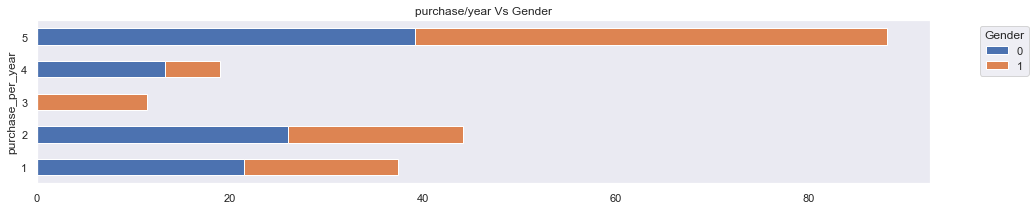

In [109]:
temp=pd.crosstab(adf['purchase_per_year'],adf['Gender'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs Gender', mark_right = True,figsize=(16,3))
plt.legend(title = 'Gender',bbox_to_anchor=(1.05, 1), loc='upper left')

*Observation :*<br>*Both male and Female count is high in Less than 10 Time purchase and it is less in 42 times and above*
<br>*When Purchase per year count high the male/Female count less and when Purchase per year count less male/Female count is high* 

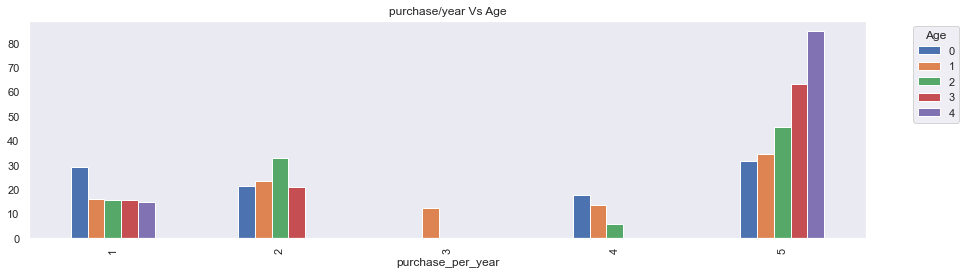

In [110]:
temp=pd.crosstab(adf['purchase_per_year'],adf['Age'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='bar', stacked=False, grid=False,title = 'purchase/year Vs Age', mark_right = True,figsize=(15,4))
plt.legend(title = 'Age',bbox_to_anchor=(1.05, 1), loc='upper left')

*Observation :*<br>*max purchase is done by Younger age group but purchase/year they do less than 10 times*
<br>*less purchase is done by as person as age increases people but  purchase/year they do up to 42 and above*

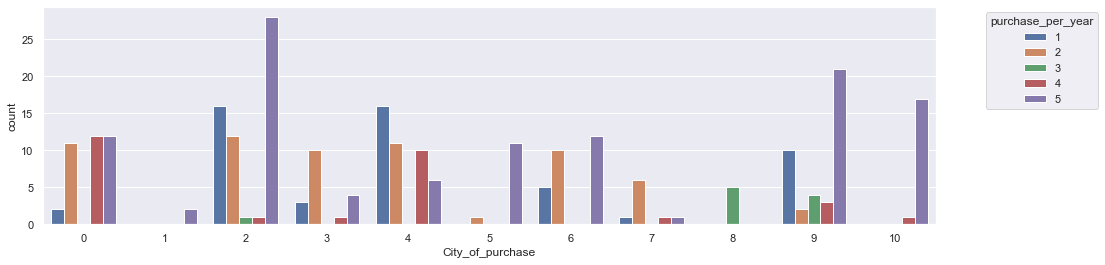

In [111]:
sns.countplot(x='City_of_purchase',hue='purchase_per_year',data=adf)
sns.set(rc={'figure.figsize':(16,4)})
#plt.title("Type of medals won over the years")
plt.legend(title = 'purchase_per_year',bbox_to_anchor=(1.05, 1), loc='upper left')

*Observation :*<br>*max people purchase less than 10 time in year in approx all cities*
<br>*least people purchase as purchase/year count increaese and also in few cities*

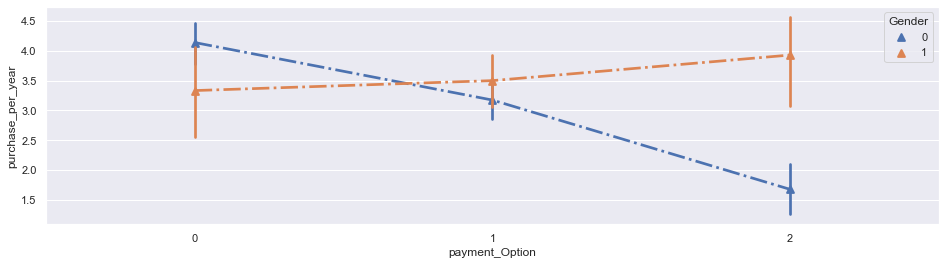

In [138]:
sns.pointplot(x = "payment_Option",y = "purchase_per_year",hue = "Gender",data = adf,linestyles='-.',markers='^')
plt.show()

*Observation :*<br>*female do max COD but less use e-wallet, male use max e-wallet but less use COD* 
<br>*per year use of male use max payment option COD/e wallet*

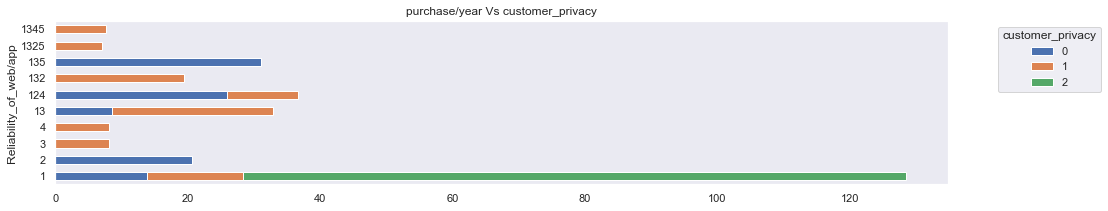

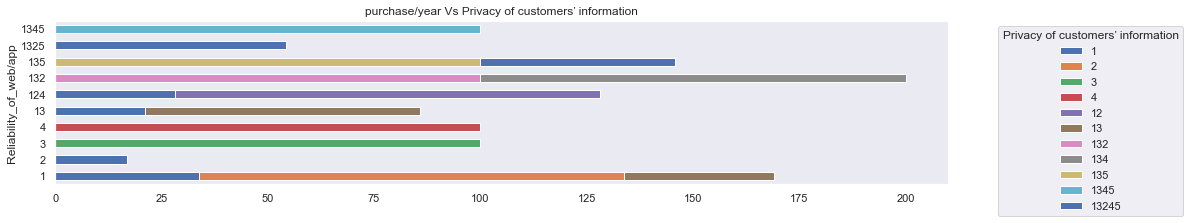

In [168]:
temp=pd.crosstab(adf['Reliability_of_web/app'],adf['customer_privacy'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs customer_privacy', mark_right = True,figsize=(16,3))
plt.legend(title = 'customer_privacy',bbox_to_anchor=(1.05, 1), loc='upper left')

temp=pd.crosstab(adf['Reliability_of_web/app'],adf['Privacy of customers’ information'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs Privacy of customers’ information', mark_right = True,figsize=(16,3))
plt.legend(title = 'Privacy of customers’ information',bbox_to_anchor=(1.05, 1), loc='upper left')


<AxesSubplot:xlabel='Available_payment_options', ylabel='purchase_per_year'>

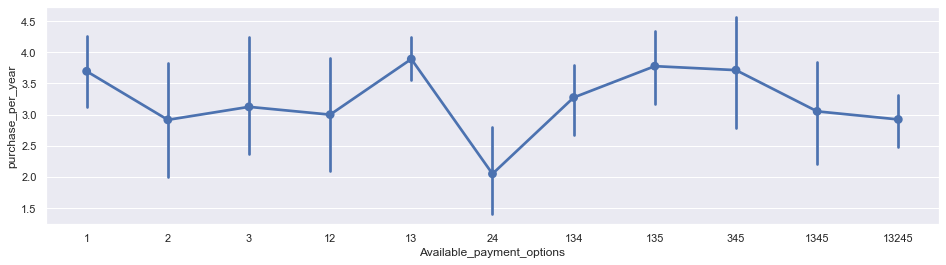

In [171]:
sns.pointplot('Available_payment_options','purchase_per_year',  data=adf, fit_reg=False)

*Observation :*<br>*max option used and max payment option is provided by Amazon and flipkart*

<AxesSubplot:xlabel='financial_Security', ylabel='purchase_per_year'>

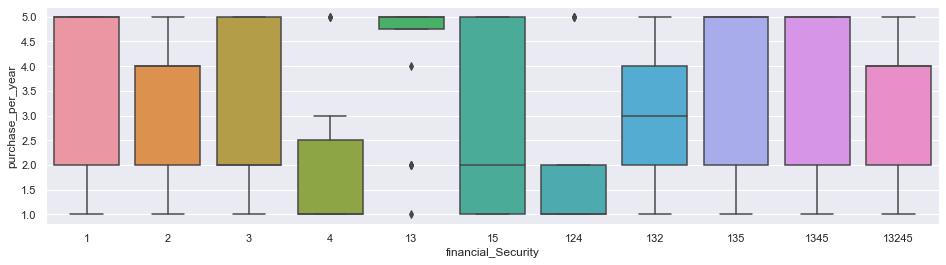

In [162]:
sns.boxplot(x = "financial_Security", y = "purchase_per_year", data = adf)


*Observation :*<br>*purchase/year is done max because Finacial Security is max of Amazon and Sanapdeal*

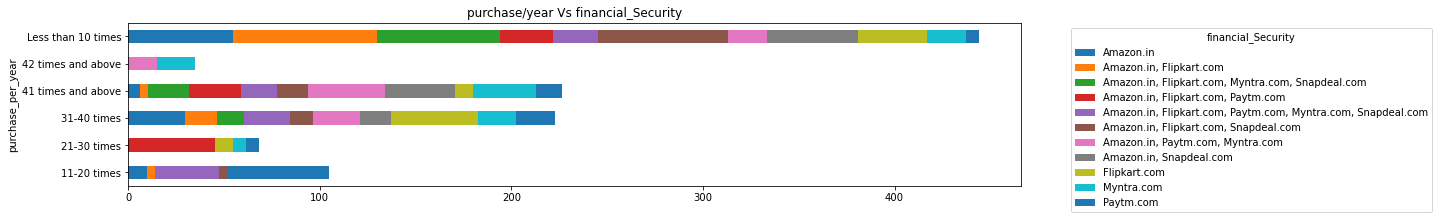

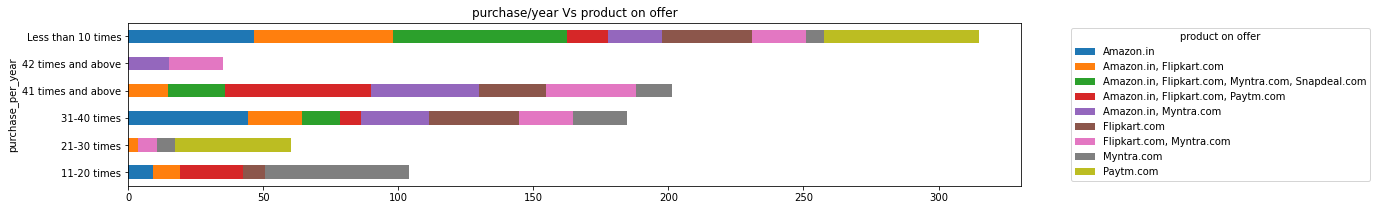

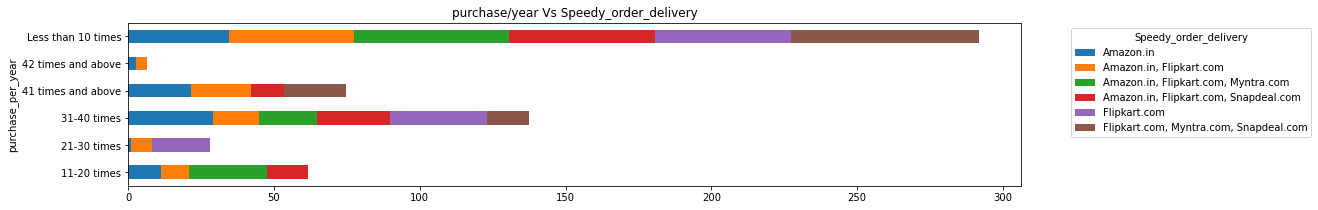

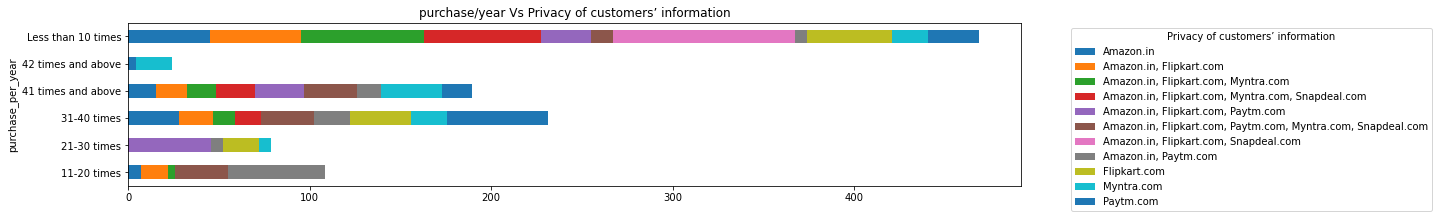

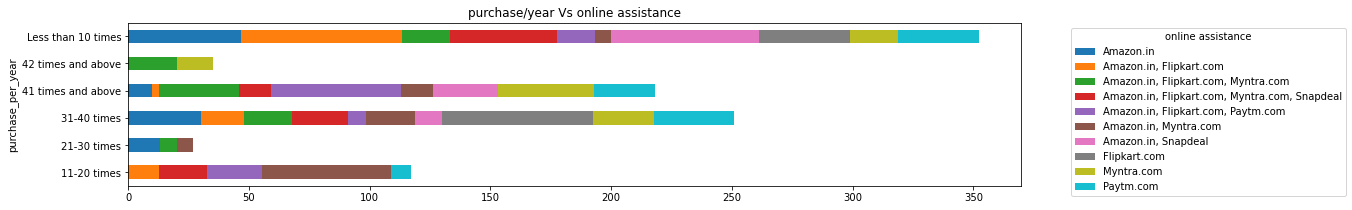

In [994]:
temp=pd.crosstab(adf['purchase_per_year'],adf['financial_Security'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs financial_Security', mark_right = True,figsize=(16,3))
plt.legend(title = 'financial_Security',bbox_to_anchor=(1.05, 1), loc='upper left')

temp=pd.crosstab(adf['purchase_per_year'],adf['product on offer'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs product on offer', mark_right = True,figsize=(16,3))
plt.legend(title = 'product on offer',bbox_to_anchor=(1.05, 1), loc='upper left')

temp=pd.crosstab(adf['purchase_per_year'],adf['Speedy_order_delivery'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs Speedy_order_delivery', mark_right = True,figsize=(16,3))
plt.legend(title = 'Speedy_order_delivery',bbox_to_anchor=(1.05, 1), loc='upper left')


temp=pd.crosstab(adf['purchase_per_year'],adf['online assistance'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs online assistance', mark_right = True,figsize=(16,3))
plt.legend(title = 'online assistance',bbox_to_anchor=(1.05, 1), loc='upper left')


<AxesSubplot:xlabel='Quickness_complete_purchase', ylabel='purchase_per_year'>

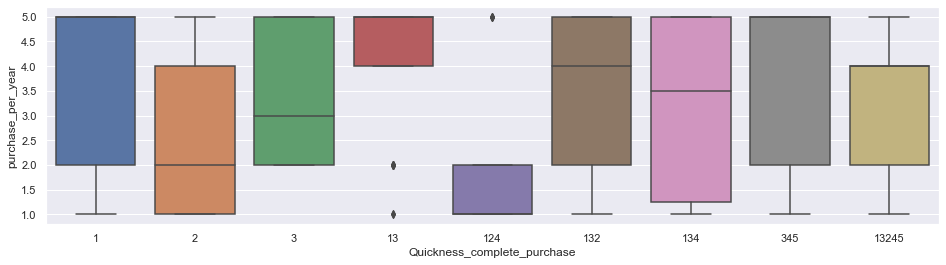

In [172]:
sns.boxplot(x = "Quickness_complete_purchase", y = "purchase_per_year", data = adf)

*Observation :*<br>*through out the year Quickness_complete_purchase is max of Amazon,filpkart,Myntra*

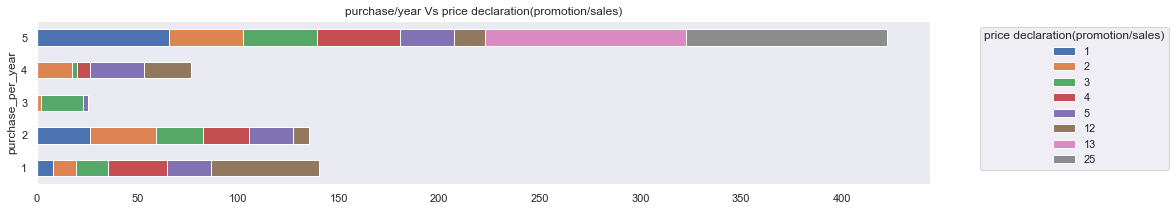

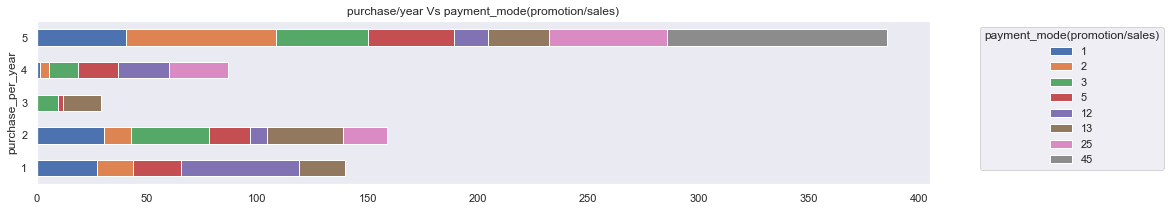

In [155]:
temp=pd.crosstab(adf['purchase_per_year'],adf['price declaration(promotion/sales)'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs price declaration(promotion/sales)', mark_right = True,figsize=(16,3))
plt.legend(title = 'price declaration(promotion/sales)',bbox_to_anchor=(1.05, 1), loc='upper left')

temp=pd.crosstab(adf['purchase_per_year'],adf['payment_mode(promotion/sales)'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'purchase/year Vs payment_mode(promotion/sales)', mark_right = True,figsize=(16,3))
plt.legend(title = 'payment_mode(promotion/sales)',bbox_to_anchor=(1.05, 1), loc='upper left')



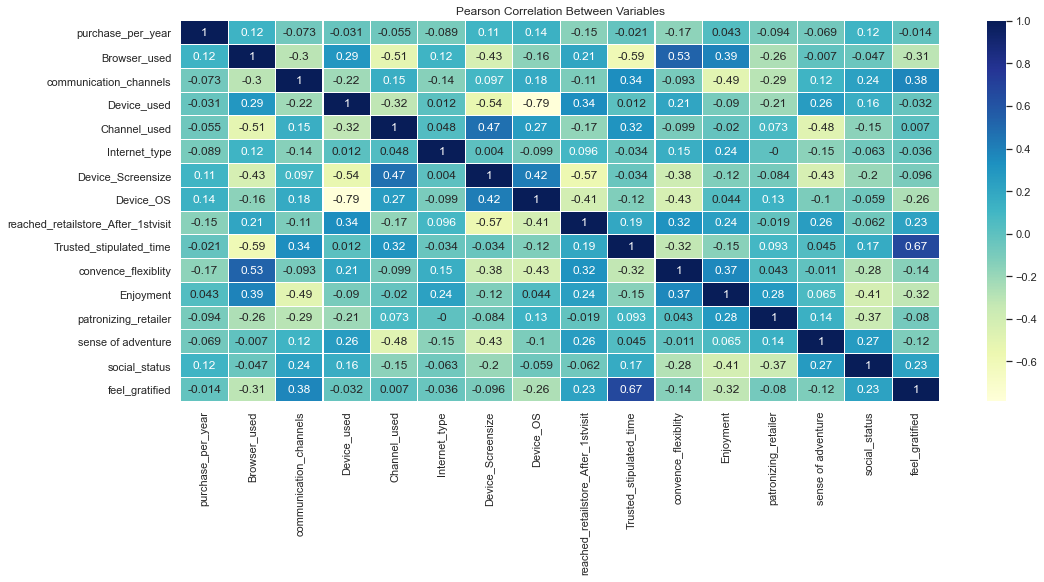

In [173]:
pcorrel = adf[['purchase_per_year','Browser_used','communication_channels','Device_used','Channel_used',
               'Internet_type','Device_Screensize','Device_OS','reached_retailstore_After_1stvisit',
               'Trusted_stipulated_time','convence_flexiblity','Enjoyment','patronizing_retailer','sense of adventure',
                 'social_status','feel_gratified']].corr(method='pearson').round(3)
plt.figure(figsize=(17,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.07)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(rotation=90)
plt.show()   

*Observation :*<br>*communicaton_channels,Channel_used,Devise_used,Internet_type,Trusted_stipulated_time,Enjoyment,
    patronizing_retailer,sense of adventure, and feel_gratified is less correlated to purchase/year*

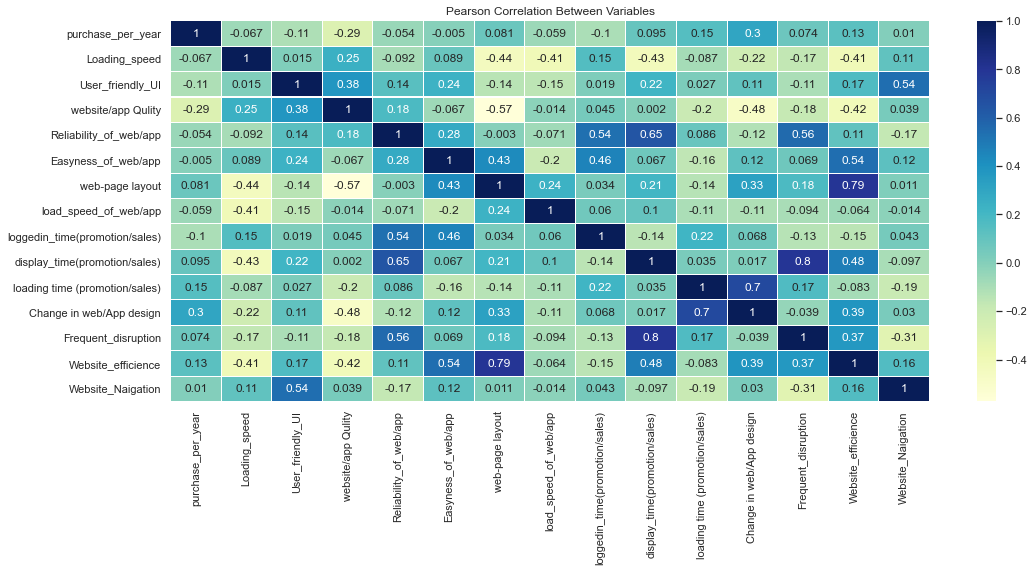

In [174]:
pcorrel = adf[['purchase_per_year','Loading_speed','User_friendly_UI','website/app Qulity','Reliability_of_web/app',
         'Easyness_of_web/app','web-page layout', 'load_speed_of_web/app','loggedin_time(promotion/sales)',
               'display_time(promotion/sales)','loading time (promotion/sales)','Change in web/App design', 
               'Frequent_disruption','Website_efficience','Website_Naigation']].corr(method='pearson').round(3)
plt.figure(figsize=(17,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.07)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(rotation=90)
plt.show()   

*Observation :*<br>*loading_speed,Reliability_of_web/app,Easyness_of_web/app,web-page layout, load_speed_of_web/app,
                  display_time(promotion/sales),Frequent_disruption and Website_Naigation is less correlated to purchase/year*

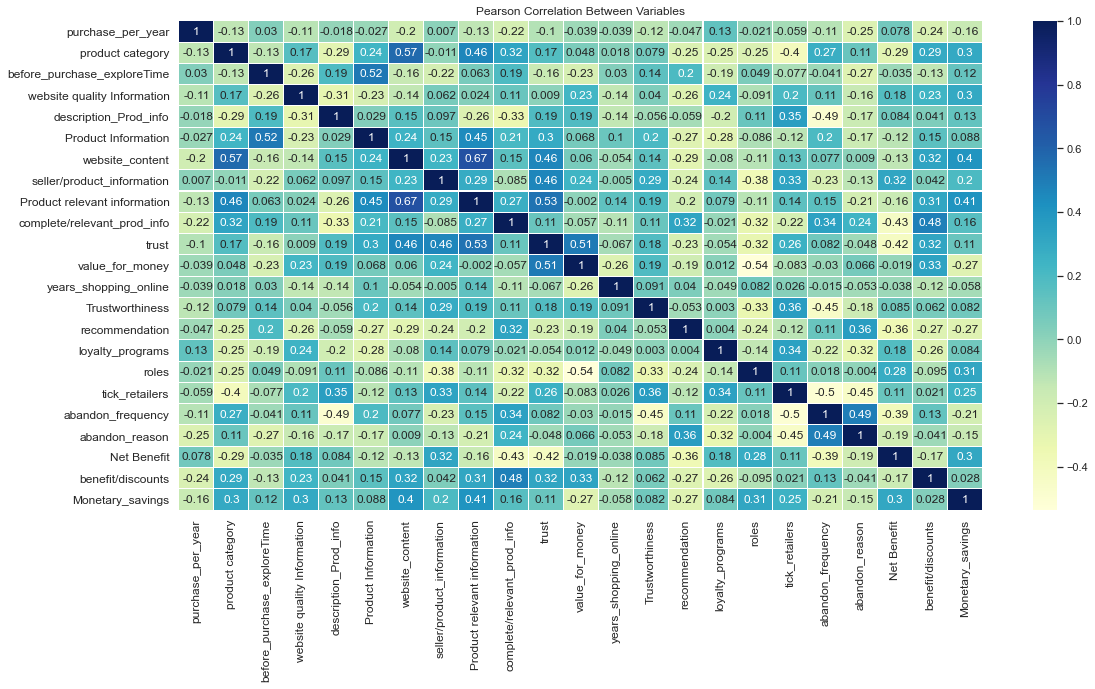

In [175]:
pcorrel = adf[['purchase_per_year','product category','before_purchase_exploreTime','website quality Information',
            'description_Prod_info','Product Information','website_content','seller/product_information',
            'Product relevant information','complete/relevant_prod_info','trust','value_for_money',
            'years_shopping_online','Trustworthiness','recommendation','loyalty_programs','roles','tick_retailers',
            'abandon_frequency','abandon_reason','Net Benefit','benefit/discounts','Monetary_savings']].corr(method='pearson').round(3)
plt.figure(figsize=(18,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.07)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*before_purchase_exploreTime,description_Prod_info,Product Information,seller/product_information,
            value_for_money,years_shopping_online,recommendation,roles,tick_retailers and 
        Net Benefit is less correlated to purchase/year*

In [121]:
# Anova Test 
from scipy import stats
from scipy.stats import f_oneway
cr=[]
ncr=[]
for i in adf.columns:
    cg=adf.groupby(['purchase_per_year'])[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        cr.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')
        ncr.append(i)

Gender ------correlated------: 9.49151316442762e-06 

Age ------correlated------: 2.0727942342069343e-05 

City_of_purchase ------correlated------: 1.1194244770553403e-05 

Pincode ------correlated------: 2.1774561766880273e-06 

years_shopping_online ------not correlated-----: 0.878497993599464 

purchase_per_year ------correlated------: 0.0 

Internet_type ------correlated------: 0.020787156899303102 

Device_used ------not correlated-----: 0.7353299049128184 

Device_Screensize ------correlated------: 0.01932500415116959 

Device_OS ------correlated------: 0.020540331259831398 

Browser_used ------correlated------: 0.10682516752148553 

Channel_used ------correlated------: 3.5606543051395326e-05 

reached_retailstore_After_1stvisit ------correlated------: 0.11352321187165837 

before_purchase_exploreTime ------correlated------: 0.45852621612246913 

payment_Option ------correlated------: 8.786681346836682e-09 

abandon_frequency ------correlated------: 0.025172204671936982 

abandon

In [176]:
print("\nCorrelated     :\n",cr)
print("\nNon Correlated :",ncr)


Correlated     :
 ['Gender', 'Age', 'City_of_purchase', 'Pincode', 'purchase_per_year', 'Internet_type', 'Device_Screensize', 'Device_OS', 'Browser_used', 'Channel_used', 'reached_retailstore_After_1stvisit', 'before_purchase_exploreTime', 'payment_Option', 'abandon_frequency', 'abandon_reason', 'website_content', 'Product Information', 'seller/product_information', 'Product relevant information', 'Website_Naigation', 'Loading_speed', 'User_friendly_UI', 'Convenient_paymnet_method', 'Trusted_stipulated_time', 'customer_privacy', 'communication_channels', 'benefit/discounts', 'Enjoyment', 'convence_flexiblity', 'Return/replacement_policy', 'loyalty_programs', 'website quality Information', 'website/app Qulity', 'Net Benefit', 'trust', 'product category', 'complete/relevant_prod_info', 'Monetary_savings', 'patronizing_retailer', 'sense of adventure', 'social_status', 'feel_gratified', 'roles', 'value_for_money', 'tick_retailers', 'Easyness_of_web/app', 'product on offer', 'description_P